In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#import pandas_profiling

In [3]:
df=pd.read_excel("Assignment01.xlsx", sheet_name="data")

In [4]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [5]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'Price'],
      dtype='object')

In [6]:
df.isnull().sum().sort_values(ascending=False)

Market Category      3742
Engine HP              69
Engine Cylinders       30
Number of Doors         6
Engine Fuel Type        3
Price                   0
Popularity              0
city mpg                0
highway MPG             0
Vehicle Style           0
Vehicle Size            0
Driven_Wheels           0
Transmission Type       0
Year                    0
Model                   0
Make                    0
dtype: int64

In [7]:
df1 = df

In [8]:
df1 = df1.fillna({
        'Engine Cylinders' : df['Engine Cylinders'].ffill(),
        'Engine HP' : df['Engine HP'].bfill()
    })

In [9]:
df1['Engine Fuel Type'].fillna(df1['Engine Fuel Type'].mode()[0], inplace=True)

In [10]:
df1['Number of Doors'].fillna(df1['Number of Doors'].mode()[0], inplace=True)

In [11]:
df1.isnull().sum().sort_values(ascending=False)

Market Category      3742
Price                   0
Popularity              0
city mpg                0
highway MPG             0
Vehicle Style           0
Vehicle Size            0
Number of Doors         0
Driven_Wheels           0
Transmission Type       0
Engine Cylinders        0
Engine HP               0
Engine Fuel Type        0
Year                    0
Model                   0
Make                    0
dtype: int64

In [12]:
df2 = df1.rename(columns={"Engine Fuel Type":"Engine_Fuel_Type","Engine HP":"Engine_HP","Engine Cylinders":"Engine_Cylinders",
                     "Transmission Type":"Transmission_Type","Number of Doors":"Number_of_Doors","Market Category":"Market_Category",
                     "Vehicle Size":"Vehicle_Size","Vehicle Style":"Vehicle_Style","highway MPG":"highway_MPG","city mpg":"city_mpg"})

In [13]:
df1.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'Price'],
      dtype='object')

In [14]:
df2.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'Price'],
      dtype='object')

In [15]:
df2.groupby(['Transmission_Type']).agg(mod  = ('Market_Category', lambda x: x.value_counts().index[0]))

,mod
Transmission_Type,
AUTOMATED_MANUAL,"Exotic,High-Performance"
AUTOMATIC,Crossover
DIRECT_DRIVE,Hatchback
MANUAL,Hatchback
UNKNOWN,"Hatchback,Factory Tuner,Performance"


In [16]:
df2['Vehicle_Size'].value_counts()

Compact    4764
Midsize    4373
Large      2777
Name: Vehicle_Size, dtype: int64

In [17]:
df2['Vehicle_Style'].value_counts()

Sedan                  3048
4dr SUV                2488
Coupe                  1211
Convertible             793
4dr Hatchback           702
Crew Cab Pickup         681
Extended Cab Pickup     623
Wagon                   592
2dr Hatchback           506
Passenger Minivan       417
Regular Cab Pickup      392
2dr SUV                 138
Passenger Van           128
Cargo Van                95
Cargo Minivan            71
Convertible SUV          29
Name: Vehicle_Style, dtype: int64

In [18]:
pop = df2.groupby(['Make']).agg(mean  = ('Popularity',lambda x: x.mean()))

In [19]:
len(pop)

48

In [20]:
pop.sort_values(by = 'mean', ascending = False)

,mean
Make,
Ford,5657
BMW,3916
Audi,3105
Ferrari,2774
Honda,2202
Toyota,2031
Nissan,2009
Dodge,1851
Kia,1720


In [21]:
df2['Engine_Cylinders'].value_counts()

4.0     4752
6.0     4511
8.0     2035
12.0     231
5.0      225
10.0      71
0.0       56
3.0       30
16.0       3
Name: Engine_Cylinders, dtype: int64

In [22]:
df2.groupby(['Vehicle_Size']).agg(mod  = ('Market_Category',lambda x: x.mode()))

,mod
Vehicle_Size,
Compact,Hatchback
Large,Flex Fuel
Midsize,Crossover


In [23]:
df2["Engine_Fuel_Type"].value_counts()

regular unleaded                                7175
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine_Fuel_Type, dtype: int64

In [24]:
df2['Transmission_Type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: Transmission_Type, dtype: int64

In [25]:
df2.groupby(['Engine_Fuel_Type']).agg(mod = ('Market_Category',lambda x: x.mode()))

,mod
Engine_Fuel_Type,
diesel,"Diesel,Luxury"
electric,Hatchback
flex-fuel (premium unleaded recommended/E85),"Flex Fuel,Luxury"
flex-fuel (premium unleaded required/E85),"Flex Fuel,Luxury,High-Performance"
flex-fuel (unleaded/E85),Flex Fuel
flex-fuel (unleaded/natural gas),"Flex Fuel,Performance"
natural gas,[]
premium unleaded (recommended),Luxury
premium unleaded (required),"Luxury,Performance"


In [26]:
df2.isnull().sum().sort_values(ascending=False)

Market_Category      3742
Price                   0
Popularity              0
city_mpg                0
highway_MPG             0
Vehicle_Style           0
Vehicle_Size            0
Number_of_Doors         0
Driven_Wheels           0
Transmission_Type       0
Engine_Cylinders        0
Engine_HP               0
Engine_Fuel_Type        0
Year                    0
Model                   0
Make                    0
dtype: int64

In [27]:
df2['Market_Category'] = df2.groupby(['Vehicle_Size'])['Market_Category'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [28]:
df2.isnull().sum().sort_values(ascending=False)

Price                0
Popularity           0
city_mpg             0
highway_MPG          0
Vehicle_Style        0
Vehicle_Size         0
Market_Category      0
Number_of_Doors      0
Driven_Wheels        0
Transmission_Type    0
Engine_Cylinders     0
Engine_HP            0
Engine_Fuel_Type     0
Year                 0
Model                0
Make                 0
dtype: int64

In [29]:
df2.duplicated().sum()

715

In [30]:
df2 = df2.drop_duplicates()

In [31]:
df2.duplicated().sum()

0

## Univariate Analysis

In [32]:
#creating overall profiling of the dataset
#pandas_profiling.ProfileReport(df2)

In [33]:
df2['Make'].value_counts()

Chevrolet        1083
Ford              825
Toyota            719
Volkswagen        568
Nissan            551
Dodge             529
GMC               482
Honda             433
Mazda             412
Cadillac          396
Suzuki            342
Mercedes-Benz     341
Infiniti          328
BMW               324
Audi              321
Volvo             266
Hyundai           259
Acura             246
Subaru            239
Kia               229
Mitsubishi        208
Lexus             202
Buick             190
Chrysler          187
Pontiac           181
Lincoln           160
Land Rover        139
Porsche           136
Oldsmobile        132
Saab              109
Aston Martin       91
Bentley            74
Plymouth           71
Ferrari            69
FIAT               62
Scion              60
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
Tesla              18
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Genesis   

<AxesSubplot:>

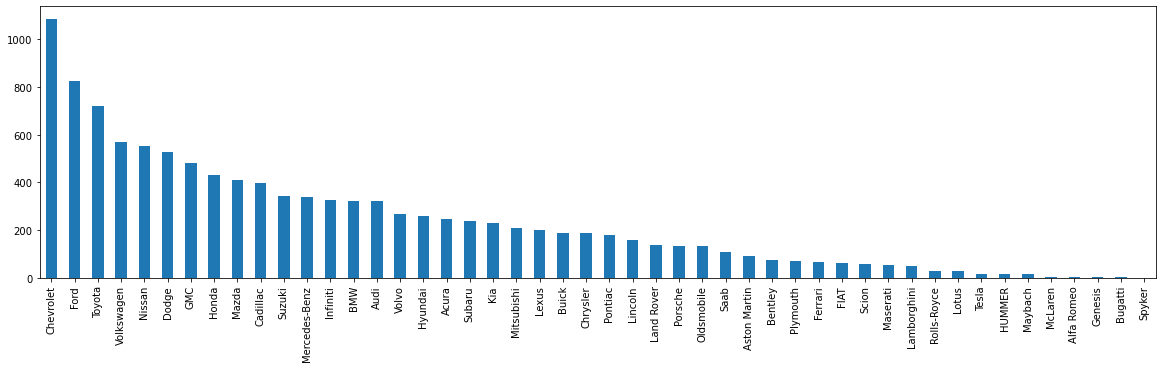

In [34]:
fig, ax = plt.subplots()
df2['Make'].value_counts().plot(ax=ax, kind='bar', figsize=(20,5))

In [35]:
df2['Engine_Fuel_Type'].value_counts()

regular unleaded                                6661
premium unleaded (required)                     1956
premium unleaded (recommended)                  1392
flex-fuel (unleaded/E85)                         887
diesel                                           150
electric                                          66
flex-fuel (premium unleaded required/E85)         53
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine_Fuel_Type, dtype: int64

<AxesSubplot:>

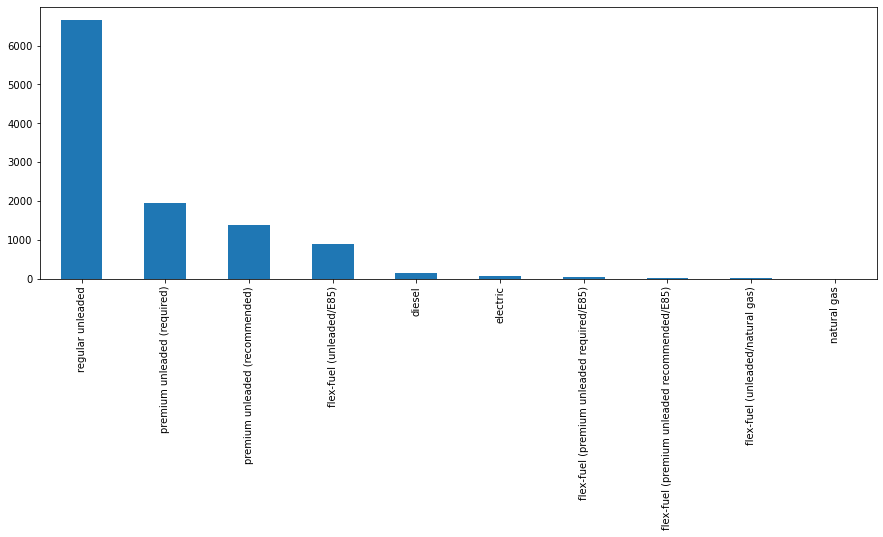

In [36]:
fig, ax = plt.subplots()
df2['Engine_Fuel_Type'].value_counts().plot(ax=ax, kind='bar',figsize=(15,5))

In [37]:
df2['Engine_HP'].describe()

count    11199.000000
mean       252.960800
std        110.074481
min         55.000000
25%        171.000000
50%        237.000000
75%        303.000000
max       1001.000000
Name: Engine_HP, dtype: float64

<AxesSubplot:xlabel='Engine_HP', ylabel='Density'>

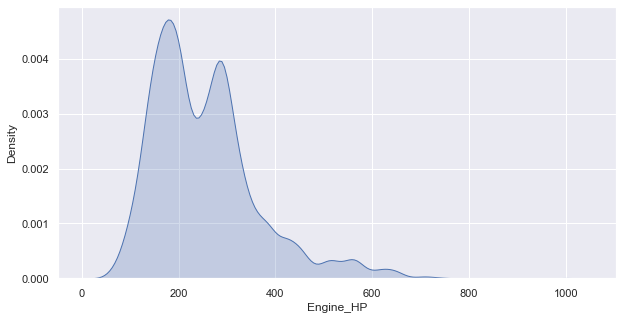

In [38]:
sns.set(rc={'figure.figsize':(10,5)})
sns.kdeplot(df2['Engine_HP'],shade=True)

In [39]:
df2['Engine_Cylinders'].value_counts()

4.0     4362
6.0     4313
8.0     1969
12.0     229
5.0      169
10.0      68
0.0       56
3.0       30
16.0       3
Name: Engine_Cylinders, dtype: int64

<AxesSubplot:>

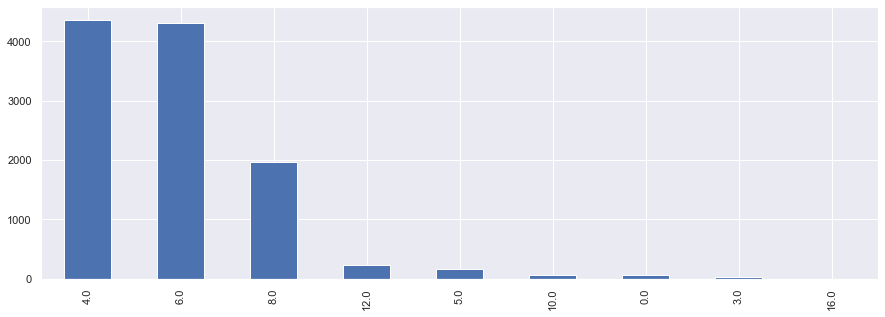

In [40]:
fig, ax = plt.subplots()
df2['Engine_Cylinders'].value_counts().plot(ax=ax, kind='bar',figsize=(15,5))

In [41]:
df2['Transmission_Type'].value_counts()

AUTOMATIC           7932
MANUAL              2634
AUTOMATED_MANUAL     553
DIRECT_DRIVE          68
UNKNOWN               12
Name: Transmission_Type, dtype: int64

<AxesSubplot:>

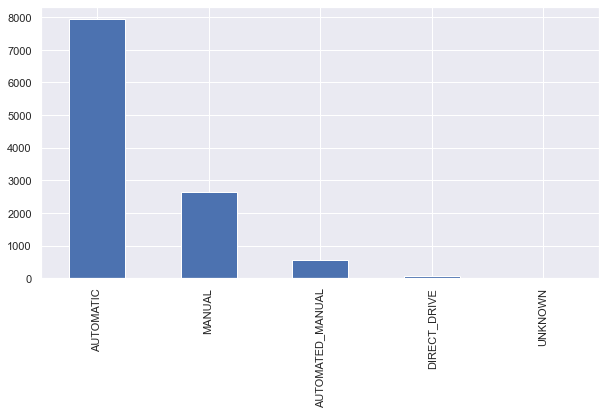

In [42]:
fig, ax = plt.subplots()
df2['Transmission_Type'].value_counts().plot(ax=ax, kind='bar',figsize=(10,5))

In [43]:
df2['Driven_Wheels'].value_counts()

front wheel drive    4354
rear wheel drive     3212
all wheel drive      2308
four wheel drive     1325
Name: Driven_Wheels, dtype: int64

<AxesSubplot:>

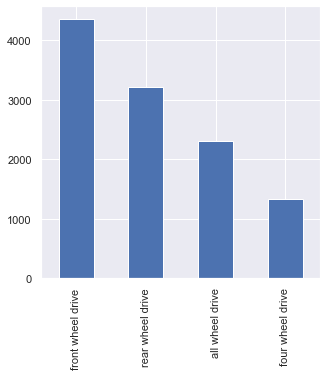

In [44]:
fig, ax = plt.subplots()
df2['Driven_Wheels'].value_counts().plot(ax=ax, kind='bar',figsize=(5,5))

In [45]:
df2['Number_of_Doors'].value_counts()

4.0    7966
2.0    2877
3.0     356
Name: Number_of_Doors, dtype: int64

<AxesSubplot:>

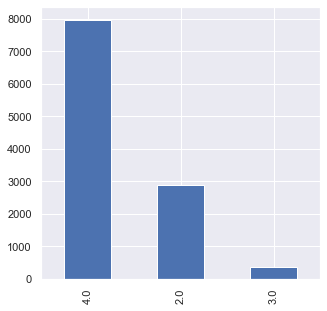

In [46]:
fig, ax = plt.subplots()
df2['Number_of_Doors'].value_counts().plot(ax=ax, kind='bar',figsize=(5,5))

In [47]:
df2['Market_Category'].value_counts()

Crossover                                          2145
Hatchback                                          2071
Flex Fuel                                          1664
Luxury                                              819
Luxury,Performance                                  659
                                                   ... 
Performance,Hybrid                                    1
Crossover,Exotic,Luxury,High-Performance              1
Exotic,Luxury,High-Performance,Hybrid                 1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Crossover,Exotic,Luxury,Performance                   1
Name: Market_Category, Length: 71, dtype: int64

In [48]:
df2['Market_Category'].isnull().sum()

0

<AxesSubplot:>

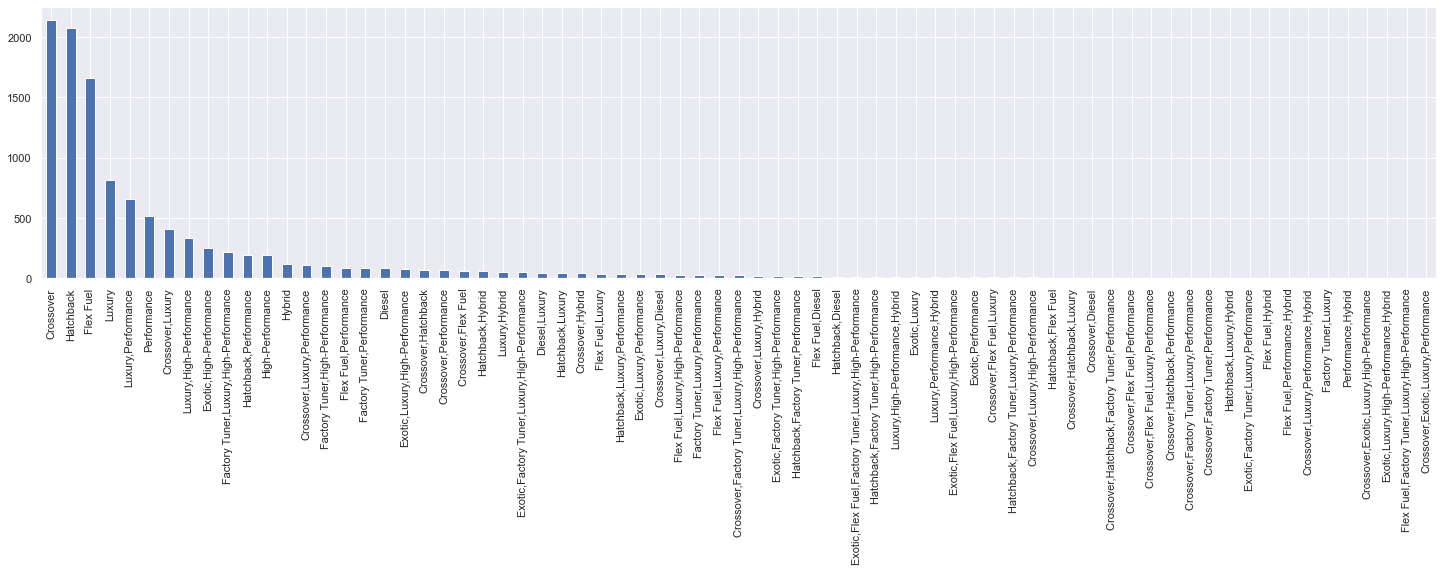

In [49]:
fig, ax = plt.subplots()
df2['Market_Category'].value_counts().plot(ax=ax, kind='bar', figsize=(25,5))

In [50]:
df2['Vehicle_Size'].value_counts()

Compact    4395
Midsize    4121
Large      2683
Name: Vehicle_Size, dtype: int64

<AxesSubplot:>

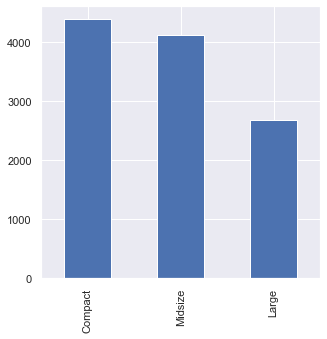

In [51]:
fig, ax = plt.subplots()
df2['Vehicle_Size'].value_counts().plot(ax=ax, kind='bar', figsize=(5,5))

In [52]:
df2['Vehicle_Style'].value_counts()

Sedan                  2843
4dr SUV                2434
Coupe                  1175
Convertible             741
4dr Hatchback           663
Crew Cab Pickup         655
Extended Cab Pickup     597
Wagon                   562
2dr Hatchback           412
Passenger Minivan       389
Regular Cab Pickup      345
Passenger Van           121
2dr SUV                  91
Cargo Van                84
Cargo Minivan            59
Convertible SUV          28
Name: Vehicle_Style, dtype: int64

<AxesSubplot:>

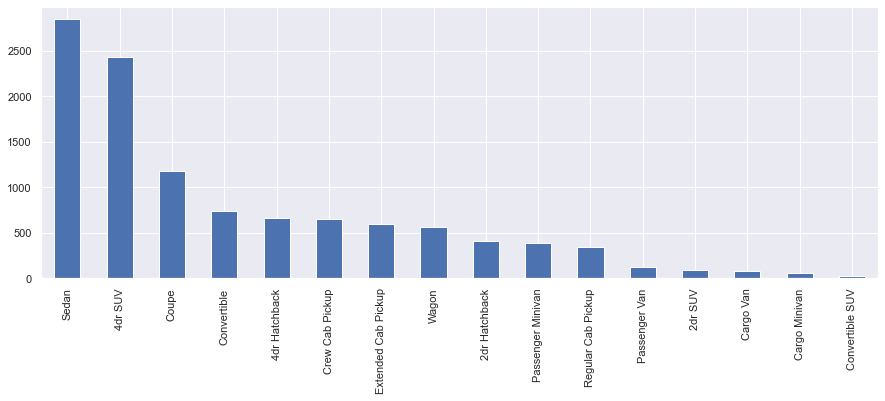

In [53]:
fig, ax = plt.subplots()
df2['Vehicle_Style'].value_counts().plot(ax=ax, kind='bar', figsize=(15,5))

In [54]:
df2['highway_MPG'].describe()

count    11199.000000
mean        26.610590
std          8.977641
min         12.000000
25%         22.000000
50%         25.000000
75%         30.000000
max        354.000000
Name: highway_MPG, dtype: float64

<AxesSubplot:xlabel='highway_MPG', ylabel='Density'>

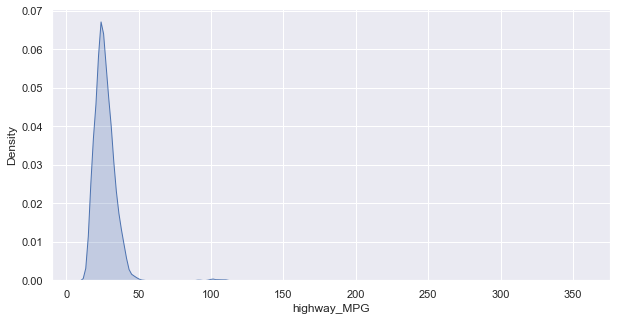

In [55]:
sns.set(rc={'figure.figsize':(10,5)})
sns.kdeplot(df2['highway_MPG'],shade=True)

In [56]:
df2['city_mpg'].describe()

count    11199.000000
mean        19.731851
std          9.177555
min          7.000000
25%         16.000000
50%         18.000000
75%         22.000000
max        137.000000
Name: city_mpg, dtype: float64

<AxesSubplot:xlabel='city_mpg', ylabel='Density'>

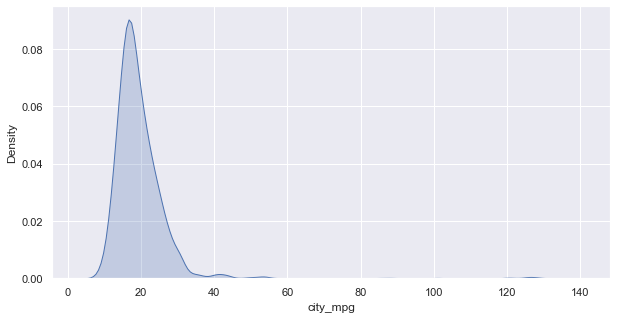

In [57]:
sns.set(rc={'figure.figsize':(10,5)})
sns.kdeplot(df2['city_mpg'],shade=True)

In [58]:
df2['Popularity'].describe()

count    11199.000000
mean      1558.483347
std       1445.668872
min          2.000000
25%        549.000000
50%       1385.000000
75%       2009.000000
max       5657.000000
Name: Popularity, dtype: float64

<AxesSubplot:xlabel='Popularity', ylabel='Density'>

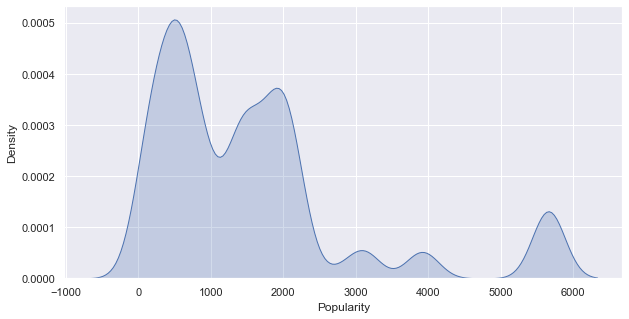

In [59]:
sns.set(rc={'figure.figsize':(10,5)})
sns.kdeplot(df2['Popularity'],shade=True)

### Bivariate Analysis

In [60]:
df2.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'Price'],
      dtype='object')

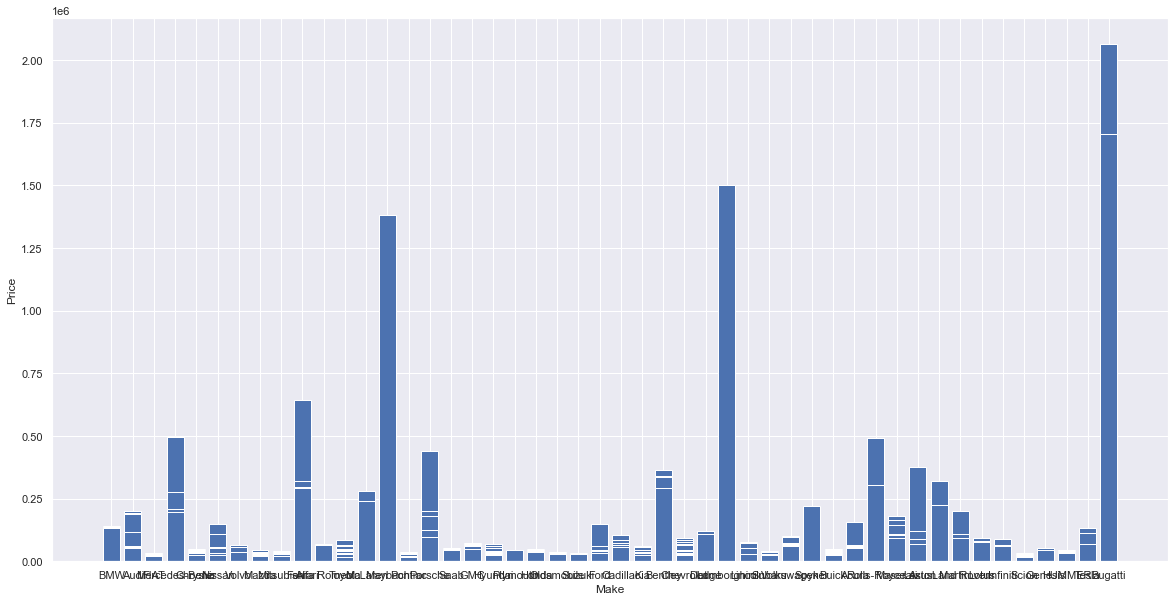

In [61]:
plt.figure(figsize=(20,10))
plt.bar(df2["Make"], df2["Price"])
plt.xlabel("Make")
plt.ylabel("Price")
plt.show()

In [62]:
df2['Model'] = df2['Model'].astype('|S80') #converting model datatype to string of length 80 bytes

In [63]:
df2['Model'].value_counts()

b'Silverado 1500'       156
b'Tundra'               129
b'F-150'                126
b'Sierra 1500'           90
b'Frontier'              76
                       ... 
b'Yukon Denali'           1
b'1 Series M'             1
b'Sierra C3'              1
b'S60 Cross Country'      1
b'Syclone'                1
Name: Model, Length: 915, dtype: int64

<AxesSubplot:xlabel='Engine_Fuel_Type', ylabel='Price'>

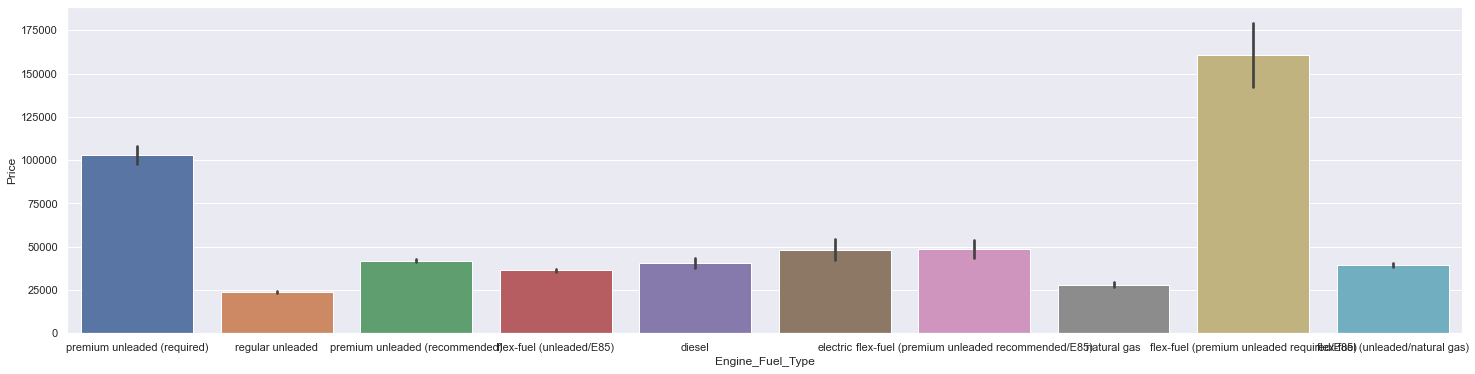

In [64]:
## Bar chart of Engine Fuel Type Vs Price
plt.figure(figsize = (25,6))
sns.barplot(x='Engine_Fuel_Type', y = 'Price', data = df2)

<AxesSubplot:xlabel='Vehicle_Size', ylabel='Price'>

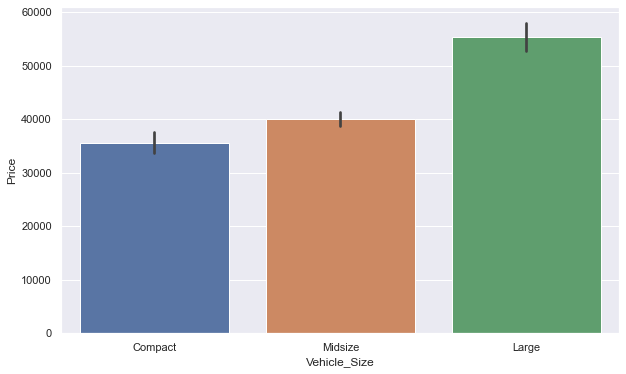

In [65]:
## Bar chart of Vehicle Size Type Vs Price
plt.figure(figsize = (10,6))
sns.barplot(x='Vehicle_Size', y = 'Price', data = df2)

<AxesSubplot:xlabel='Vehicle_Style', ylabel='Price'>

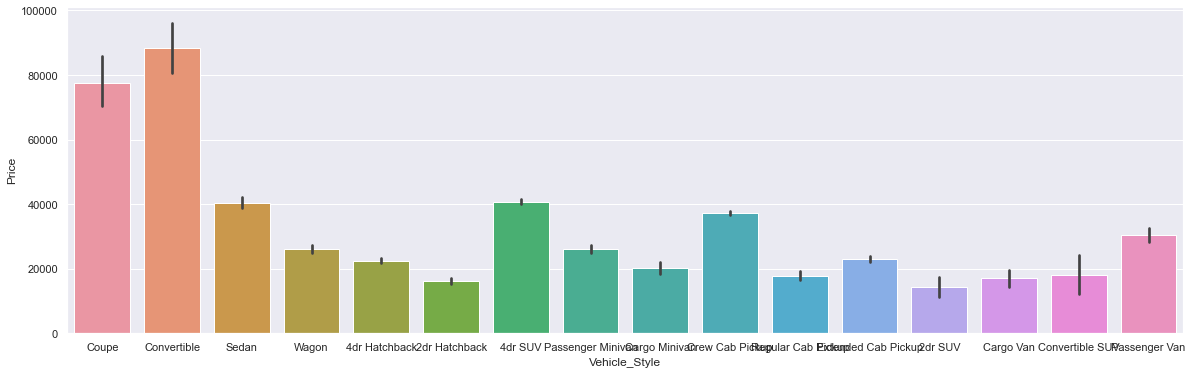

In [66]:
## Bar chart of Vehicle Style Type Vs Price
plt.figure(figsize = (20,6))
sns.barplot(x='Vehicle_Style', y = 'Price', data = df2)

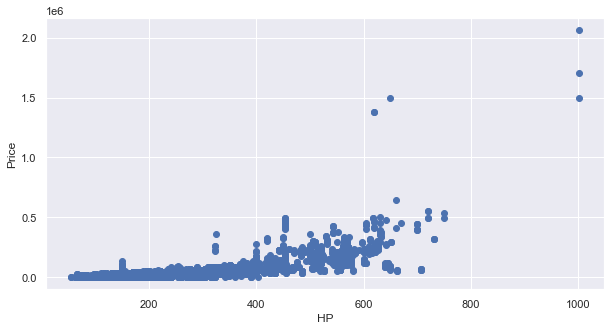

In [67]:
plt.scatter(df2["Engine_HP"], df2["Price"])
plt.xlabel("HP")
plt.ylabel("Price")
plt.show()

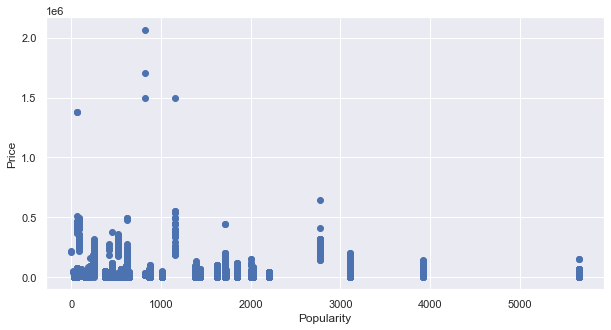

In [68]:
plt.scatter(df2["Popularity"], df2["Price"])
plt.xlabel("Popularity")
plt.ylabel("Price")
plt.show()

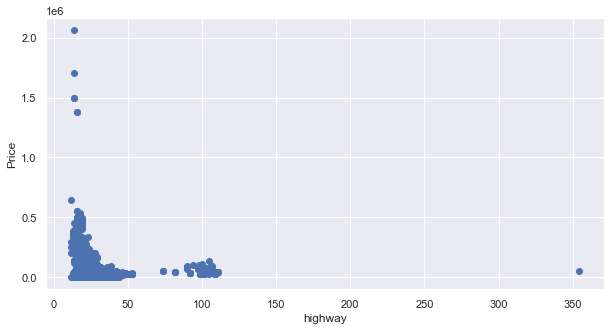

In [69]:
plt.scatter(df2["highway_MPG"], df2["Price"])
plt.xlabel("highway")
plt.ylabel("Price")
plt.show()

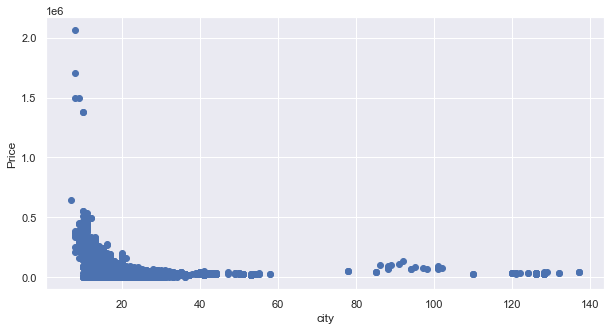

In [70]:
plt.scatter(df2["city_mpg"], df2["Price"])
plt.xlabel("city")
plt.ylabel("Price")
plt.show()

<AxesSubplot:xlabel='Transmission_Type', ylabel='Price'>

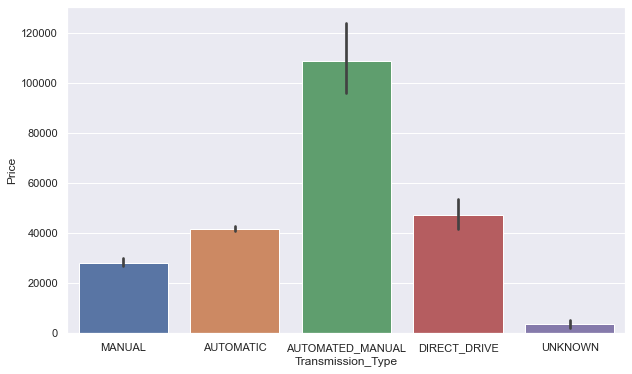

In [71]:
## Bar chart of Transmission Type Vs Price
plt.figure(figsize = (10,6))
sns.barplot(x='Transmission_Type', y = 'Price', data = df2)

<AxesSubplot:xlabel='Driven_Wheels', ylabel='Price'>

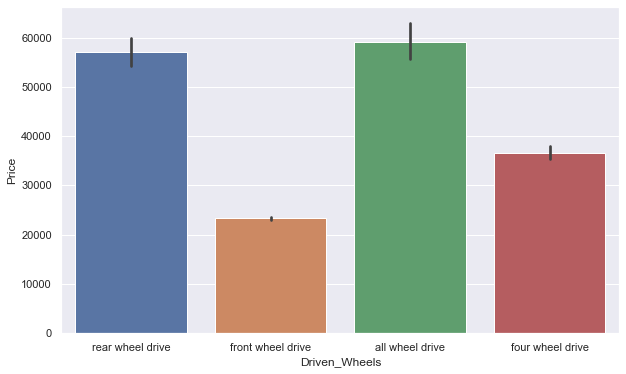

In [72]:
## Bar chart of Driven Wheels Vs Price
plt.figure(figsize = (10,6))
sns.barplot(x='Driven_Wheels', y = 'Price', data = df2)

<AxesSubplot:xlabel='Engine_HP', ylabel='Price'>

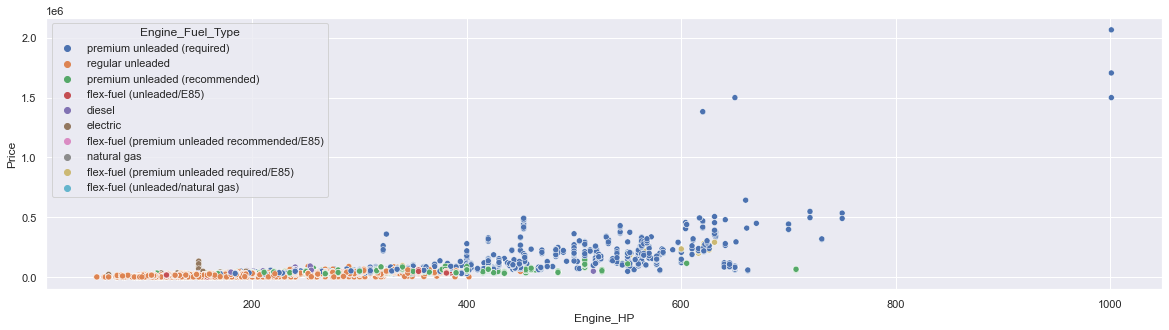

In [73]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x=df2['Engine_HP'], y=df2['Price'], hue=df2['Engine_Fuel_Type'])

## Multivariate

In [74]:
import statsmodels.api as sm  # Statical learning

In [75]:
corr_data = df2.corr()

In [76]:
corr_data

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,highway_MPG,city_mpg,Popularity,Price
Year,1.000000,0.332808,-0.033372,0.247739,0.244972,0.188417,0.085874,0.209635
Engine_HP,0.332808,1.000000,0.778035,-0.130401,-0.386293,-0.383818,0.039312,0.656712
Engine_Cylinders,-0.033372,0.778035,1.000000,-0.148748,-0.585362,-0.548398,0.037709,0.537458
Number_of_Doors,0.247739,-0.130401,-0.148748,1.000000,0.115081,0.121013,-0.057213,-0.144353
highway_MPG,0.244972,-0.386293,-0.585362,0.115081,1.000000,0.886299,-0.017159,-0.166631
city_mpg,0.188417,-0.383818,-0.548398,0.121013,0.886299,1.000000,-0.000549,-0.162343
Popularity,0.085874,0.039312,0.037709,-0.057213,-0.017159,-0.000549,1.000000,-0.048371
Price,0.209635,0.656712,0.537458,-0.144353,-0.166631,-0.162343,-0.048371,1.000000


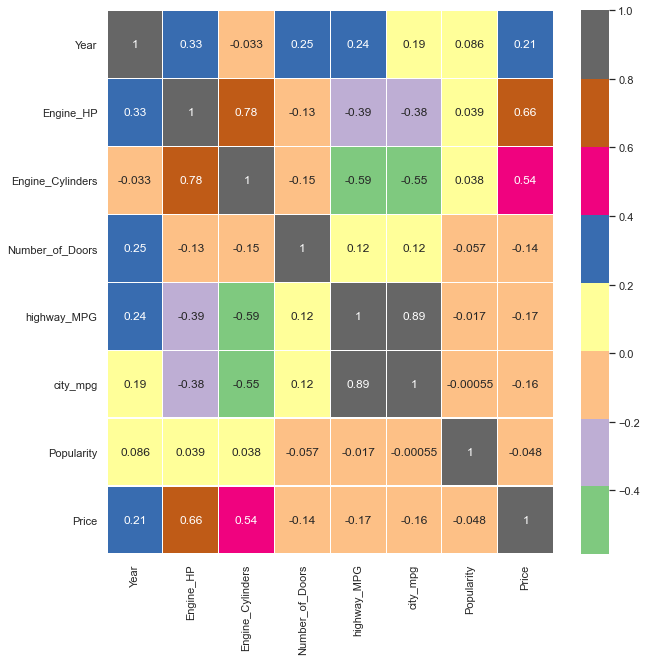

In [77]:
#import seaborn as sns
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr_data, ax=ax,cmap="Accent", linewidths=0.1, annot = True)
plt.show()

### EDA

In [78]:
#Checking Outliers
Outliers=df2.describe(percentiles=[.01,.05,.1,.2,.25,.5,.75,.90,.95,.99]).T

In [79]:
Outliers

,count,mean,std,min,1%,5%,10%,20%,25%,50%,75%,90%,95%,99%,max
Year,11199.0,2010.714528,7.228211,1990.0,1991.0,1994.0,1998.0,2005.0,2007.0,2015.0,2016.0,2017.0,2017.0,2017.00,2017.0
Engine_HP,11199.0,252.960800,110.074481,55.0,92.0,120.0,138.0,161.0,171.0,237.0,303.0,390.0,467.0,621.00,1001.0
Engine_Cylinders,11199.0,5.669167,1.797611,0.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,8.0,8.0,12.00,16.0
Number_of_Doors,11199.0,3.454416,0.872804,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.00,4.0
highway_MPG,11199.0,26.610590,8.977641,12.0,15.0,17.0,18.0,21.0,22.0,25.0,30.0,35.0,38.0,46.00,354.0
city_mpg,11199.0,19.731851,9.177555,7.0,10.0,12.0,13.0,15.0,16.0,18.0,22.0,26.0,29.0,44.06,137.0
Popularity,11199.0,1558.483347,1445.668872,2.0,26.0,155.0,204.0,481.0,549.0,1385.0,2009.0,3916.0,5657.0,5657.00,5657.0
Price,11199.0,41925.927136,61535.047817,2000.0,2000.0,2000.0,2921.6,19329.0,21599.5,30675.0,43032.5,66918.0,112070.0,290009.22,2065902.0


In [80]:
df.describe(percentiles=[.01,.05,.1,.2,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,5%,10%,20%,25%,50%,75%,90%,95%,99%,max
Year,11914.0,2010.384338,7.579740,1990.0,1990.0,1993.0,1997.0,2004.0,2007.0,2015.0,2016.00,2017.0,2017.00,2017.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,90.0,118.0,138.0,160.0,170.0,227.0,300.00,385.0,460.00,620.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,4.0,4.0,4.0,4.0,6.0,6.00,8.0,8.00,12.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.00,4.0,4.00,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,15.0,17.0,18.0,21.0,22.0,26.0,30.00,35.0,38.00,46.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,10.0,12.0,13.0,15.0,16.0,18.0,22.00,26.0,29.00,44.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,26.0,155.0,204.0,481.0,549.0,1385.0,2009.00,3916.0,5657.00,5657.00,5657.0
Price,11914.0,40594.737032,60109.103604,2000.0,2000.0,2000.0,2254.6,18485.0,21000.0,29995.0,42231.25,65080.0,107530.25,284488.12,2065902.0


In [81]:
df2.groupby(['Vehicle_Style']).agg(mod  = ('Vehicle_Size',lambda x: x.mode()))

,mod
Vehicle_Style,
2dr Hatchback,Compact
2dr SUV,Compact
4dr Hatchback,Compact
4dr SUV,Midsize
Cargo Minivan,Compact
Cargo Van,Midsize
Convertible,Compact
Convertible SUV,Compact
Coupe,Compact


In [82]:
df2['avg_eco_mpg'] = df2.apply(lambda _: '', axis=1)

In [83]:
df2.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'Price', 'avg_eco_mpg'],
      dtype='object')

In [84]:
Outliers=df2.describe(percentiles=[.01,.05,.1,.2,.25,.5,.75,.90,.91,.92, .93,.94,.95,.96, .97, .98,.99,.995,.999]).T

In [85]:
Outliers

,count,mean,std,min,1%,5%,10%,20%,25%,50%,...,93%,94%,95%,96%,97%,98%,99%,99.5%,99.9%,max
Year,11199.0,2010.714528,7.228211,1990.0,1991.0,1994.0,1998.0,2005.0,2007.0,2015.0,...,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.00,2017.0,2017.000,2017.0
Engine_HP,11199.0,252.960800,110.074481,55.0,92.0,120.0,138.0,161.0,171.0,237.0,...,430.0,450.0,467.0,510.0,540.0,565.0,621.00,645.0,717.426,1001.0
Engine_Cylinders,11199.0,5.669167,1.797611,0.0,4.0,4.0,4.0,4.0,4.0,6.0,...,8.0,8.0,8.0,8.0,8.0,12.0,12.00,12.0,12.000,16.0
Number_of_Doors,11199.0,3.454416,0.872804,2.0,2.0,2.0,2.0,2.0,2.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.00,4.0,4.000,4.0
highway_MPG,11199.0,26.610590,8.977641,12.0,15.0,17.0,18.0,21.0,22.0,25.0,...,37.0,37.0,38.0,39.0,40.0,42.0,46.00,92.0,108.802,354.0
city_mpg,11199.0,19.731851,9.177555,7.0,10.0,12.0,13.0,15.0,16.0,18.0,...,28.0,28.0,29.0,30.0,31.0,36.0,44.06,88.0,128.000,137.0
Popularity,11199.0,1558.483347,1445.668872,2.0,26.0,155.0,204.0,481.0,549.0,1385.0,...,5657.0,5657.0,5657.0,5657.0,5657.0,5657.0,5657.00,5657.0,5657.000,5657.0
Price,11199.0,41925.927136,61535.047817,2000.0,2000.0,2000.0,2921.6,19329.0,21599.5,30675.0,...,86025.8,95895.0,112070.0,137532.0,182512.0,218536.0,290009.22,366032.0,497650.000,2065902.0


In [86]:
df1['Engine HP'].describe()

count    11914.000000
mean       249.006883
std        109.110749
min         55.000000
25%        170.000000
50%        225.000000
75%        300.000000
max       1001.000000
Name: Engine HP, dtype: float64

In [87]:
df2.shape

(11199, 17)

In [88]:
df2.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'Price', 'avg_eco_mpg'],
      dtype='object')

In [89]:
if (df2['Vehicle_Style'] == '2dr Hatchback', '2dr SUV', '4dr Hatchback', '4dr SUV', 'Convertible', 'Convertible SUV',
       'Coupe', 'Sedan'):
    df2['avg_eco_mpg'] = (0.55 * df2['city_mpg'] + 0.45 * df2['highway_MPG'])
else:
    df2['avg_eco_mpg'] = (0.35 * df2['city_mpg'] + 0.65 * df2['highway_MPG'])

In [90]:
df2

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,Price,avg_eco_mpg
0,BMW,b'1 Series M',2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,22.15
1,BMW,b'1 Series',2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,23.05
2,BMW,b'1 Series',2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,23.60
3,BMW,b'1 Series',2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,22.50
4,BMW,b'1 Series',2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,22.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,b'ZDX',2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120,19.15
11910,Acura,b'ZDX',2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670,19.15
11911,Acura,b'ZDX',2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620,19.15
11912,Acura,b'ZDX',2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920,19.15


In [91]:
df2['avg_eco_mpg'].describe()

count    11199.000000
mean        22.827284
std          8.828766
min          9.250000
25%         18.350000
50%         21.500000
75%         25.600000
max        172.500000
Name: avg_eco_mpg, dtype: float64

In [92]:
df2['Popularity'].describe()

count    11199.000000
mean      1558.483347
std       1445.668872
min          2.000000
25%        549.000000
50%       1385.000000
75%       2009.000000
max       5657.000000
Name: Popularity, dtype: float64

In [93]:
df2.duplicated().sum()

0

In [94]:
df3 = df2.drop_duplicates().copy()

In [95]:
df3.duplicated().sum()

0

In [96]:
df2.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'Price', 'avg_eco_mpg'],
      dtype='object')

In [97]:
df3.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'Price', 'avg_eco_mpg'],
      dtype='object')

In [98]:
pop1 = df3.groupby(['Make']).agg({'Popularity':np.mean})

In [99]:
pop1['popularity_ratio'] = (pop1['Popularity']/np.sum(pop1['Popularity']))*100

In [100]:
pop1

,Popularity,popularity_ratio
Make,,
Acura,204,0.436644
Alfa Romeo,113,0.241866
Aston Martin,259,0.554366
Audi,3105,6.645976
BMW,3916,8.381849
Bentley,520,1.113014
Bugatti,820,1.755137
Buick,155,0.331764
Cadillac,1624,3.476027


In [101]:
pop1.drop(['Popularity'], axis = 'columns', inplace =True)

In [102]:
df3 = pd.merge(df3, pop1, on = "Make")

In [103]:
df3

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,Price,avg_eco_mpg,popularity_ratio
0,BMW,b'1 Series M',2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,22.15,8.381849
1,BMW,b'1 Series',2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,23.05,8.381849
2,BMW,b'1 Series',2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,23.60,8.381849
3,BMW,b'1 Series',2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,22.50,8.381849
4,BMW,b'1 Series',2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,22.50,8.381849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Tesla,b'Model S',2016,electric,150.0,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,100,91,1391,112000,95.05,2.977312
11195,Tesla,b'Model S',2016,electric,150.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",Large,Sedan,90,88,1391,70000,88.90,2.977312
11196,Bugatti,b'Veyron 16.4',2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,2065902,10.70,1.755137
11197,Bugatti,b'Veyron 16.4',2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1500000,10.70,1.755137


In [104]:
df3['Model'].value_counts()

b'Silverado 1500'    156
b'Tundra'            129
b'F-150'             126
b'Sierra 1500'        90
b'Frontier'           76
                    ... 
b'Pulsar'              1
b'Evora 400'           1
b'Syclone'             1
b'1 Series M'          1
b'Sierra C3'           1
Name: Model, Length: 915, dtype: int64

In [105]:
df3['Transmission_Type'].value_counts()

AUTOMATIC           7932
MANUAL              2634
AUTOMATED_MANUAL     553
DIRECT_DRIVE          68
UNKNOWN               12
Name: Transmission_Type, dtype: int64

### Checking R-squared by numbering different categories in columns

##### creating a copy df3

In [106]:
df4 = df3.copy()

In [107]:
#df['column name'] = df['column name'].replace(['1st old value','2nd old value',...],['1st new value','2nd new value',...])
df4['Transmission_Type'] = df4['Transmission_Type'].replace(['AUTOMATIC','MANUAL','AUTOMATED_MANUAL',
                                                            'DIRECT_DRIVE','UNKNOWN'],['1','2','3','4','0'])

In [108]:
df4['Transmission_Type'] = df4['Transmission_Type'].astype(int)

In [109]:
df4.describe()

,Year,Engine_HP,Engine_Cylinders,Transmission_Type,Number_of_Doors,highway_MPG,city_mpg,Popularity,Price,avg_eco_mpg,popularity_ratio
count,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,1.119900e+04,11199.000000,11199.000000
mean,2010.714528,252.960800,5.669167,1.351103,3.454416,26.610590,19.731851,1558.483347,4.192593e+04,22.827284,3.335795
std,7.228211,110.074481,1.797611,0.604314,0.872804,8.977641,9.177555,1445.668872,6.153505e+04,8.828766,3.094325
min,1990.000000,55.000000,0.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03,9.250000,0.004281
25%,2007.000000,171.000000,4.000000,1.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04,18.350000,1.175086
50%,2015.000000,237.000000,6.000000,1.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04,21.500000,2.964469
75%,2016.000000,303.000000,6.000000,2.000000,4.000000,30.000000,22.000000,2009.000000,4.303250e+04,25.600000,4.300086
max,2017.000000,1001.000000,16.000000,4.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06,172.500000,12.108305


In [110]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11198
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  |S80   
 2   Year               11199 non-null  int64  
 3   Engine_Fuel_Type   11199 non-null  object 
 4   Engine_HP          11199 non-null  float64
 5   Engine_Cylinders   11199 non-null  float64
 6   Transmission_Type  11199 non-null  int32  
 7   Driven_Wheels      11199 non-null  object 
 8   Number_of_Doors    11199 non-null  float64
 9   Market_Category    11199 non-null  object 
 10  Vehicle_Size       11199 non-null  object 
 11  Vehicle_Style      11199 non-null  object 
 12  highway_MPG        11199 non-null  int64  
 13  city_mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  Price              11199 non-null  int64  
 16  avg_eco_mpg        111

In [111]:
df4['Driven_Wheels'].value_counts()

front wheel drive    4354
rear wheel drive     3212
all wheel drive      2308
four wheel drive     1325
Name: Driven_Wheels, dtype: int64

In [112]:
unique_vals = df4['Make'].unique()
df4['Make'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

In [113]:
unique_vals = df4['Model'].unique()
df4['Model'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

In [114]:
unique_vals = df4['Engine_Fuel_Type'].unique()
df4['Engine_Fuel_Type'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

In [115]:
unique_vals = df4['Driven_Wheels'].unique()
df4['Driven_Wheels'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

In [116]:
unique_vals = df4['Market_Category'].unique()
df4['Market_Category'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

In [117]:
unique_vals = df4['Vehicle_Size'].unique()
df4['Vehicle_Size'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

In [118]:
unique_vals = df4['Vehicle_Style'].unique()
df4['Vehicle_Style'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

In [119]:
df4

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,Price,avg_eco_mpg,popularity_ratio
0,0,0,2011,0,335.0,6.0,2,0,2.0,0,0,0,26,19,3916,46135,22.15,8.381849
1,0,1,2011,0,300.0,6.0,2,0,2.0,1,0,1,28,19,3916,40650,23.05,8.381849
2,0,1,2011,0,300.0,6.0,2,0,2.0,2,0,0,28,20,3916,36350,23.60,8.381849
3,0,1,2011,0,230.0,6.0,2,0,2.0,1,0,0,28,18,3916,29450,22.50,8.381849
4,0,1,2011,0,230.0,6.0,2,0,2.0,3,0,1,28,18,3916,34500,22.50,8.381849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,46,913,2016,4,150.0,0.0,4,1,4.0,40,2,4,100,91,1391,112000,95.05,2.977312
11195,46,913,2016,4,150.0,0.0,4,0,4.0,70,2,4,90,88,1391,70000,88.90,2.977312
11196,47,914,2008,0,1001.0,16.0,3,1,2.0,40,0,0,14,8,820,2065902,10.70,1.755137
11197,47,914,2008,0,1001.0,16.0,3,1,2.0,40,0,0,14,8,820,1500000,10.70,1.755137


In [120]:
df4.describe()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,Price,avg_eco_mpg,popularity_ratio
count,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,1.119900e+04,11199.000000,11199.000000
mean,20.176623,449.747210,2010.714528,2.489776,252.960800,5.669167,1.351103,1.338602,3.454416,21.862488,0.847129,4.769354,26.610590,19.731851,1558.483347,4.192593e+04,22.827284,3.335795
std,11.628940,240.698283,7.228211,1.640393,110.074481,1.797611,0.604314,1.017002,0.872804,11.957687,0.780196,3.294435,8.977641,9.177555,1445.668872,6.153505e+04,8.828766,3.094325
min,0.000000,0.000000,1990.000000,0.000000,55.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03,9.250000,0.004281
25%,11.000000,260.000000,2007.000000,1.000000,171.000000,4.000000,1.000000,0.000000,2.000000,14.000000,0.000000,3.000000,22.000000,16.000000,549.000000,2.159950e+04,18.350000,1.175086
50%,22.000000,455.000000,2015.000000,3.000000,237.000000,6.000000,1.000000,2.000000,4.000000,24.000000,1.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04,21.500000,2.964469
75%,28.000000,642.000000,2016.000000,3.000000,303.000000,6.000000,2.000000,2.000000,4.000000,28.000000,1.000000,5.000000,30.000000,22.000000,2009.000000,4.303250e+04,25.600000,4.300086
max,47.000000,914.000000,2017.000000,9.000000,1001.000000,16.000000,4.000000,3.000000,4.000000,70.000000,2.000000,15.000000,354.000000,137.000000,5657.000000,2.065902e+06,172.500000,12.108305


In [121]:
df4.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'Price', 'avg_eco_mpg',
       'popularity_ratio'],
      dtype='object')

In [122]:
df4.dropna(inplace=True)

#### Checking initial R2 value

In [123]:
import statsmodels.api as sm 
X = df4[['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'avg_eco_mpg',
       'popularity_ratio'
        ]]
Y = df4['Price']
# Y=df3["Sales_in_thousands"]

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
#predictions = model.predict(X) 


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     772.3
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:10:46   Log-Likelihood:            -1.3540e+05
No. Observations:               11199   AIC:                         2.708e+05
Df Residuals:                   11183   BIC:                         2.710e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.449e+05    1.6e+0

### Creating dummies

In [124]:
demand = df3['Make'].value_counts()

In [125]:
demand = demand.to_frame().reset_index()

In [126]:
demand =  demand.rename(columns = {'index':'Make','Make':'sales_demand'})

In [127]:
demand['sales_demand_range'] = ''

In [128]:
demand

,Make,sales_demand,sales_demand_range
0,Chevrolet,1083,
1,Ford,825,
2,Toyota,719,
3,Volkswagen,568,
4,Nissan,551,
5,Dodge,529,
6,GMC,482,
7,Honda,433,
8,Mazda,412,
9,Cadillac,396,


In [129]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Make                48 non-null     object
 1   sales_demand        48 non-null     int64 
 2   sales_demand_range  48 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


In [130]:
demand['sales_demand_range'] = np.where((demand['sales_demand'] >= 800), 'high',
                                        np.where((demand['sales_demand'] < 800) & (demand['sales_demand'] >= 450),'good',
                                                np.where((demand['sales_demand'] < 450) & (demand['sales_demand'] >= 200),'medium',
                                                        np.where((demand['sales_demand'] < 200) & (demand['sales_demand'] >= 60),'bad',
                                                                np.where((demand['sales_demand'] < 60),'less','')))))

In [131]:
demand

,Make,sales_demand,sales_demand_range
0,Chevrolet,1083,high
1,Ford,825,high
2,Toyota,719,good
3,Volkswagen,568,good
4,Nissan,551,good
5,Dodge,529,good
6,GMC,482,good
7,Honda,433,medium
8,Mazda,412,medium
9,Cadillac,396,medium


In [132]:
demand = demand.drop(columns = ['sales_demand'])

In [133]:
df3 = pd.merge(df3, demand, on = "Make")

In [134]:
df3

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,Price,avg_eco_mpg,popularity_ratio,sales_demand_range
0,BMW,b'1 Series M',2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,22.15,8.381849,medium
1,BMW,b'1 Series',2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,23.05,8.381849,medium
2,BMW,b'1 Series',2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,23.60,8.381849,medium
3,BMW,b'1 Series',2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,22.50,8.381849,medium
4,BMW,b'1 Series',2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,22.50,8.381849,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Tesla,b'Model S',2016,electric,150.0,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,100,91,1391,112000,95.05,2.977312,less
11195,Tesla,b'Model S',2016,electric,150.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",Large,Sedan,90,88,1391,70000,88.90,2.977312,less
11196,Bugatti,b'Veyron 16.4',2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,2065902,10.70,1.755137,less
11197,Bugatti,b'Veyron 16.4',2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1500000,10.70,1.755137,less


In [135]:
df3['Popularity'].describe()

count    11199.000000
mean      1558.483347
std       1445.668872
min          2.000000
25%        549.000000
50%       1385.000000
75%       2009.000000
max       5657.000000
Name: Popularity, dtype: float64

In [136]:
df3['popularity_range'] = np.where((df3['Popularity'] >= 3000), 'high',
                                        np.where((df3['Popularity'] < 3000) & (df3['Popularity'] >= 1000),'medium',
                                                np.where((df3['Popularity'] < 1000) ,'low','')))

In [137]:
market_cat = df3['Market_Category'].value_counts()

In [138]:
#df = pd.DataFrame(data,index=data[:,0])
market_cat = market_cat.to_frame().reset_index()

In [139]:
market_cat = market_cat.rename(columns = {'index':'Market_Category', 'Market_Category':'count'})

In [140]:
market_cat

,Market_Category,count
0,Crossover,2145
1,Hatchback,2071
2,Flex Fuel,1664
3,Luxury,819
4,"Luxury,Performance",659
...,...,...
66,"Performance,Hybrid",1
67,"Crossover,Exotic,Luxury,High-Performance",1
68,"Exotic,Luxury,High-Performance,Hybrid",1
69,"Flex Fuel,Factory Tuner,Luxury,High-Performance",1


In [141]:
market_cat['num_of_feature'] = market_cat['Market_Category'].str.count(',') + 1

In [142]:
market_cat = market_cat.drop(columns = ['count'])

In [143]:
df3 = pd.merge(df3, market_cat, on = "Market_Category")

In [144]:
df3['Engine_HP'].value_counts()

200.0    378
170.0    261
240.0    251
285.0    246
210.0    243
        ... 
97.0       1
670.0      1
572.0      1
151.0      1
456.0      1
Name: Engine_HP, Length: 356, dtype: int64

In [145]:
df3['Engine_HP'].describe()

count    11199.000000
mean       252.960800
std        110.074481
min         55.000000
25%        171.000000
50%        237.000000
75%        303.000000
max       1001.000000
Name: Engine_HP, dtype: float64

In [146]:
#correlation = column_1.corr(column_2)
col1 = df3['Engine_HP']
col2 = df3['Engine_Cylinders']
col3 = df3['avg_eco_mpg']

In [147]:
hp_corr = col1.corr(col2)
hp_corr

0.778035371587244

In [148]:
mpg_corr = col1.corr(col3)
mpg_corr

-0.39620264413876655

In [149]:
df3['hp_per_cyl'] = df3['Engine_HP']/df3['Engine_Cylinders']

In [150]:
df3['hp_per_cyl'].describe()

count    1.119900e+04
mean              inf
std               NaN
min      6.600000e+00
25%      3.500000e+01
50%      4.437500e+01
75%      5.066667e+01
max               inf
Name: hp_per_cyl, dtype: float64

In [151]:
df3['hp_per_cyl'].isnull().sum()

0

In [152]:
df3 = df3.replace([np.inf, -np.inf], 0)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\missing.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\missing.py:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= arr == x


In [153]:
df3['hp_per_cyl'].describe()

count    11199.000000
mean        43.887979
std         11.993872
min          0.000000
25%         35.000000
50%         44.375000
75%         50.333333
max        129.500000
Name: hp_per_cyl, dtype: float64

In [154]:
df3

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,...,highway_MPG,city_mpg,Popularity,Price,avg_eco_mpg,popularity_ratio,sales_demand_range,popularity_range,num_of_feature,hp_per_cyl
0,BMW,b'1 Series M',2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,26,19,3916,46135,22.15,8.381849,medium,high,3,55.833333
1,BMW,b'2 Series',2016,premium unleaded (required),320.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,31,20,3916,48750,24.95,8.381849,medium,high,3,53.333333
2,BMW,b'2 Series',2016,premium unleaded (required),320.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,31,20,3916,44150,24.95,8.381849,medium,high,3,53.333333
3,BMW,b'2 Series',2016,premium unleaded (required),320.0,6.0,AUTOMATIC,all wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,30,20,3916,46150,24.50,8.381849,medium,high,3,53.333333
4,BMW,b'2 Series',2016,premium unleaded (required),320.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,30,20,3916,50750,24.50,8.381849,medium,high,3,53.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Tesla,b'Model S',2016,electric,150.0,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,Performance",...,101,98,1391,66000,99.35,2.977312,less,medium,2,0.000000
11195,Tesla,b'Model S',2016,electric,150.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",...,100,97,1391,74500,98.35,2.977312,less,medium,2,0.000000
11196,Tesla,b'Model S',2016,electric,150.0,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,Performance",...,107,101,1391,71000,103.70,2.977312,less,medium,2,0.000000
11197,Tesla,b'Model S',2016,electric,150.0,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,Performance",...,102,101,1391,75000,101.45,2.977312,less,medium,2,0.000000


## Creating the Linear model

##### creating a copy of df3

In [155]:
df5 = df3.copy()

In [156]:
df5['current_year'] = 2020

In [157]:
df5['year_old'] = df5['current_year']-df5['Year']

In [158]:
df5

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,...,Popularity,Price,avg_eco_mpg,popularity_ratio,sales_demand_range,popularity_range,num_of_feature,hp_per_cyl,current_year,year_old
0,BMW,b'1 Series M',2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,3916,46135,22.15,8.381849,medium,high,3,55.833333,2020,9
1,BMW,b'2 Series',2016,premium unleaded (required),320.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,3916,48750,24.95,8.381849,medium,high,3,53.333333,2020,4
2,BMW,b'2 Series',2016,premium unleaded (required),320.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,3916,44150,24.95,8.381849,medium,high,3,53.333333,2020,4
3,BMW,b'2 Series',2016,premium unleaded (required),320.0,6.0,AUTOMATIC,all wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,3916,46150,24.50,8.381849,medium,high,3,53.333333,2020,4
4,BMW,b'2 Series',2016,premium unleaded (required),320.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,3916,50750,24.50,8.381849,medium,high,3,53.333333,2020,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Tesla,b'Model S',2016,electric,150.0,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,Performance",...,1391,66000,99.35,2.977312,less,medium,2,0.000000,2020,4
11195,Tesla,b'Model S',2016,electric,150.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",...,1391,74500,98.35,2.977312,less,medium,2,0.000000,2020,4
11196,Tesla,b'Model S',2016,electric,150.0,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,Performance",...,1391,71000,103.70,2.977312,less,medium,2,0.000000,2020,4
11197,Tesla,b'Model S',2016,electric,150.0,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,Performance",...,1391,75000,101.45,2.977312,less,medium,2,0.000000,2020,4


In [159]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11198
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                11199 non-null  object 
 1   Model               11199 non-null  |S80   
 2   Year                11199 non-null  int64  
 3   Engine_Fuel_Type    11199 non-null  object 
 4   Engine_HP           11199 non-null  float64
 5   Engine_Cylinders    11199 non-null  float64
 6   Transmission_Type   11199 non-null  object 
 7   Driven_Wheels       11199 non-null  object 
 8   Number_of_Doors     11199 non-null  float64
 9   Market_Category     11199 non-null  object 
 10  Vehicle_Size        11199 non-null  object 
 11  Vehicle_Style       11199 non-null  object 
 12  highway_MPG         11199 non-null  int64  
 13  city_mpg            11199 non-null  int64  
 14  Popularity          11199 non-null  int64  
 15  Price               11199 non-null  int64  
 16  avg_

In [160]:
df5['year_old'].describe()

count    11199.000000
mean         9.285472
std          7.228211
min          3.000000
25%          4.000000
50%          5.000000
75%         13.000000
max         30.000000
Name: year_old, dtype: float64

In [161]:
df5['condition'] = np.where((df5['year_old'] >= 25), 'vintage',
                                np.where((df5['year_old'] >= 15) & (df5['year_old'] < 25),'notfit',
                                         np.where((df5['year_old'] >= 5) & (df5['year_old'] < 15) ,'old',
                                                  np.where((df5['year_old'] < 5) ,'new',''))))

In [162]:
df5['Year_bin'] = np.where((df5['Year'] >= 1990) & (df5['Year'] < 2000), 'bin1',
                                np.where((df5['Year'] >= 2000) & (df5['Year'] < 2005),'bin2',
                                         np.where((df5['Year'] >= 2005) & (df5['Year'] < 2010) ,'bin3',
                                                  np.where((df5['Year'] >= 2010) & (df5['Year'] < 2015) ,'bin4',
                                                           np.where((df5['Year'] >= 2015) & (df5['Year'] < 2020) ,'bin5','')))))

In [163]:
df5

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,...,avg_eco_mpg,popularity_ratio,sales_demand_range,popularity_range,num_of_feature,hp_per_cyl,current_year,year_old,condition,Year_bin
0,BMW,b'1 Series M',2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,22.15,8.381849,medium,high,3,55.833333,2020,9,old,bin4
1,BMW,b'2 Series',2016,premium unleaded (required),320.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,24.95,8.381849,medium,high,3,53.333333,2020,4,new,bin5
2,BMW,b'2 Series',2016,premium unleaded (required),320.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,24.95,8.381849,medium,high,3,53.333333,2020,4,new,bin5
3,BMW,b'2 Series',2016,premium unleaded (required),320.0,6.0,AUTOMATIC,all wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,24.50,8.381849,medium,high,3,53.333333,2020,4,new,bin5
4,BMW,b'2 Series',2016,premium unleaded (required),320.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,24.50,8.381849,medium,high,3,53.333333,2020,4,new,bin5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Tesla,b'Model S',2016,electric,150.0,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,Performance",...,99.35,2.977312,less,medium,2,0.000000,2020,4,new,bin5
11195,Tesla,b'Model S',2016,electric,150.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",...,98.35,2.977312,less,medium,2,0.000000,2020,4,new,bin5
11196,Tesla,b'Model S',2016,electric,150.0,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,Performance",...,103.70,2.977312,less,medium,2,0.000000,2020,4,new,bin5
11197,Tesla,b'Model S',2016,electric,150.0,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,Performance",...,101.45,2.977312,less,medium,2,0.000000,2020,4,new,bin5


In [164]:
quantity = df5.groupby(['Model','Year_bin']).agg({'Price': np.mean})

In [165]:
quantity = quantity.reset_index()

In [166]:
quantity

,Model,Year_bin,Price
0,b'1 Series',bin4,38276.666667
1,b'1 Series M',bin4,46135.000000
2,b'100',bin1,2000.000000
3,b'124 Spider',bin5,26895.000000
4,b'190-Class',bin1,2000.000000
...,...,...,...
1151,b'xA',bin2,12880.000000
1152,b'xA',bin3,13055.000000
1153,b'xB',bin4,18510.000000
1154,b'xB',bin5,18291.666667


In [167]:
df7 = df5.copy()

In [168]:
df7 = pd.merge(df7, quantity, on = ("Model","Year_bin"))

In [169]:
#df7['namelen'] = [min(70, len(n)) for n in df7['Model']]

In [170]:
df7

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,...,popularity_ratio,sales_demand_range,popularity_range,num_of_feature,hp_per_cyl,current_year,year_old,condition,Year_bin,Price_y
0,BMW,b'1 Series M',2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,8.381849,medium,high,3,55.833333,2020,9,old,bin4,46135.000000
1,BMW,b'2 Series',2016,premium unleaded (required),320.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,8.381849,medium,high,3,53.333333,2020,4,new,bin5,41697.058824
2,BMW,b'2 Series',2016,premium unleaded (required),320.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,8.381849,medium,high,3,53.333333,2020,4,new,bin5,41697.058824
3,BMW,b'2 Series',2016,premium unleaded (required),320.0,6.0,AUTOMATIC,all wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,8.381849,medium,high,3,53.333333,2020,4,new,bin5,41697.058824
4,BMW,b'2 Series',2016,premium unleaded (required),320.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,8.381849,medium,high,3,53.333333,2020,4,new,bin5,41697.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Maserati,b'Levante',2017,premium unleaded (required),424.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Exotic,Luxury,High-Performance",...,0.509418,less,low,4,70.666667,2020,3,new,bin5,77500.000000
11195,Maserati,b'Levante',2017,premium unleaded (required),345.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Exotic,Luxury,Performance",...,0.509418,less,low,4,57.500000,2020,3,new,bin5,77500.000000
11196,Lexus,b'CT 200h',2015,regular unleaded,134.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Luxury,Hybrid",...,0.971747,medium,low,3,33.500000,2020,5,old,bin5,31566.666667
11197,Lexus,b'CT 200h',2016,regular unleaded,134.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Luxury,Hybrid",...,0.971747,medium,low,3,33.500000,2020,4,new,bin5,31566.666667


In [171]:
df7['Model'].nunique()

915

In [172]:
df5.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine_Fuel_Type      0
Engine_HP             0
Engine_Cylinders      0
Transmission_Type     0
Driven_Wheels         0
Number_of_Doors       0
Market_Category       0
Vehicle_Size          0
Vehicle_Style         0
highway_MPG           0
city_mpg              0
Popularity            0
Price                 0
avg_eco_mpg           0
popularity_ratio      0
sales_demand_range    0
popularity_range      0
num_of_feature        0
hp_per_cyl            0
current_year          0
year_old              0
condition             0
Year_bin              0
dtype: int64

In [173]:
df5['Vehicle_Style'] = df5['Vehicle_Style'].replace(['Passenger Van', 'Cargo_Van','Cargo_Minivan','Passenger_Minivan'], 'Van')
df5['Vehicle_Style'] = df5['Vehicle_Style'].replace(['Convertible SUV', '2dr SUV','4dr SUV'], 'SUV')
df5['Vehicle_Style'] = df5['Vehicle_Style'].replace(['Regular Cab Pickup', 'Extended Cab Pickup','Crew Cab Pickup'], 'Cab')
df5['Vehicle_Style'] = df5['Vehicle_Style'].replace(['2dr Hatchback', '4dr Hatchback'], 'Hatchback')

In [174]:
df5['Engine_Fuel_Type'] = df5['Engine_Fuel_Type'].replace(['natural gas', 'flex-fuel (unleaded/natural gas)'], 'Natural')
df5['Engine_Fuel_Type'] = df5['Engine_Fuel_Type'].replace(['premium unleaded (required)', 'flex-fuel (premium unleaded required/E85)'], 'unleaded required')
df5['Engine_Fuel_Type'] = df5['Engine_Fuel_Type'].replace(['premium unleaded (recommended)', 'flex-fuel (premium unleaded recommended/E85)'], 'unleaded recommended')
df5['Engine_Fuel_Type'] = df5['Engine_Fuel_Type'].replace(['regular unleaded','flex-fuel (unleaded/E85)'], 'unleaded')

In [175]:
#list(df5['Vehicle_Style'].value_counts().index)

In [176]:
#df5['Market_Category'].value_counts()
#list(df5['Market_Category'].value_counts().index)

In [177]:
df5=df5.drop(columns=["Market_Category"], axis=1)
#df5=df5.drop(columns=["Make"], axis=1)
df5=df5.drop(columns=["Model"], axis=1)

In [178]:
df5=df5.drop(columns=['Year','current_year'], axis=1)
df5=df5.drop(columns=['highway_MPG','city_mpg'], axis=1)

In [179]:
#df5=df5.drop(columns=["avg_eco_mpg"], axis=1)
df5.head()

,Make,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,Popularity,Price,avg_eco_mpg,popularity_ratio,sales_demand_range,popularity_range,num_of_feature,hp_per_cyl,year_old,condition,Year_bin
0,BMW,unleaded required,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,3916,46135,22.15,8.381849,medium,high,3,55.833333,9,old,bin4
1,BMW,unleaded required,320.0,6.0,AUTOMATIC,rear wheel drive,2.0,Compact,Convertible,3916,48750,24.95,8.381849,medium,high,3,53.333333,4,new,bin5
2,BMW,unleaded required,320.0,6.0,AUTOMATIC,rear wheel drive,2.0,Compact,Coupe,3916,44150,24.95,8.381849,medium,high,3,53.333333,4,new,bin5
3,BMW,unleaded required,320.0,6.0,AUTOMATIC,all wheel drive,2.0,Compact,Coupe,3916,46150,24.50,8.381849,medium,high,3,53.333333,4,new,bin5
4,BMW,unleaded required,320.0,6.0,AUTOMATIC,rear wheel drive,2.0,Compact,Convertible,3916,50750,24.50,8.381849,medium,high,3,53.333333,4,new,bin5


In [180]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11198
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                11199 non-null  object 
 1   Engine_Fuel_Type    11199 non-null  object 
 2   Engine_HP           11199 non-null  float64
 3   Engine_Cylinders    11199 non-null  float64
 4   Transmission_Type   11199 non-null  object 
 5   Driven_Wheels       11199 non-null  object 
 6   Number_of_Doors     11199 non-null  float64
 7   Vehicle_Size        11199 non-null  object 
 8   Vehicle_Style       11199 non-null  object 
 9   Popularity          11199 non-null  int64  
 10  Price               11199 non-null  int64  
 11  avg_eco_mpg         11199 non-null  float64
 12  popularity_ratio    11199 non-null  float64
 13  sales_demand_range  11199 non-null  object 
 14  popularity_range    11199 non-null  object 
 15  num_of_feature      11199 non-null  int64  
 16  hp_p

In [181]:
df5['Engine_Cylinders'] = df5['Engine_Cylinders'].astype(int)
df5['Number_of_Doors'] = df5['Number_of_Doors'].astype(int)

In [182]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11198
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                11199 non-null  object 
 1   Engine_Fuel_Type    11199 non-null  object 
 2   Engine_HP           11199 non-null  float64
 3   Engine_Cylinders    11199 non-null  int32  
 4   Transmission_Type   11199 non-null  object 
 5   Driven_Wheels       11199 non-null  object 
 6   Number_of_Doors     11199 non-null  int32  
 7   Vehicle_Size        11199 non-null  object 
 8   Vehicle_Style       11199 non-null  object 
 9   Popularity          11199 non-null  int64  
 10  Price               11199 non-null  int64  
 11  avg_eco_mpg         11199 non-null  float64
 12  popularity_ratio    11199 non-null  float64
 13  sales_demand_range  11199 non-null  object 
 14  popularity_range    11199 non-null  object 
 15  num_of_feature      11199 non-null  int64  
 16  hp_p

In [183]:
df3['Price'].describe()

count    1.119900e+04
mean     4.192593e+04
std      6.153505e+04
min      2.000000e+03
25%      2.159950e+04
50%      3.067500e+04
75%      4.303250e+04
max      2.065902e+06
Name: Price, dtype: float64

In [184]:
df5['Price']

0        46135
1        48750
2        44150
3        46150
4        50750
         ...  
11194    66000
11195    74500
11196    71000
11197    75000
11198    70000
Name: Price, Length: 11199, dtype: int64

In [185]:
df3['Price'].unique().tolist()

[46135,
 48750,
 44150,
 46150,
 50750,
 46450,
 49050,
 51050,
 44450,
 117300,
 122200,
 122500,
 135200,
 132200,
 131300,
 128300,
 137000,
 51700,
 62000,
 63500,
 64000,
 133205,
 64200,
 72500,
 74200,
 65700,
 74700,
 66200,
 92900,
 93600,
 94100,
 115700,
 117200,
 117500,
 118200,
 111900,
 119700,
 113400,
 113700,
 120000,
 44990,
 45990,
 49300,
 51300,
 50100,
 52100,
 50400,
 52400,
 66000,
 81900,
 66910,
 77900,
 68900,
 69600,
 79200,
 70900,
 82700,
 106500,
 108900,
 110700,
 41100,
 47000,
 42500,
 48650,
 48400,
 42900,
 49500,
 54000,
 48100,
 55400,
 54300,
 55700,
 49800,
 56100,
 55100,
 50200,
 49200,
 59350,
 53100,
 75500,
 75300,
 74100,
 82500,
 82900,
 79900,
 114900,
 115900,
 56850,
 57200,
 52500,
 62950,
 71900,
 63900,
 50800,
 73250,
 65250,
 52000,
 72800,
 67000,
 65200,
 75000,
 211000,
 151500,
 213200,
 153000,
 215500,
 154600,
 48500,
 49950,
 89200,
 135000,
 89500,
 106550,
 107800,
 100600,
 103200,
 101700,
 104300,
 217900,
 141450,
 1

In [186]:
#df5['Price'] = df5['Price'].apply(lambda x: '{:.2f}'.format(x))

In [187]:
df5['Price_range'] = np.where((df5['Price'] >= 1500) & (df5['Price'] < 10000), 'cheap',
                                np.where((df5['Price'] >= 10000) & (df5['Price'] < 35000),'low',
                                         np.where((df5['Price'] >= 35000) & (df5['Price'] < 70000) ,'affordable',
                                                  np.where((df5['Price'] >= 70000) & (df5['Price'] < 150000) ,'expensive',
                                                           np.where((df5['Price'] >= 150000) ,'very_expensive','')))))

#### Visualising new df5 dataset

<AxesSubplot:xlabel='Vehicle_Style', ylabel='Price'>

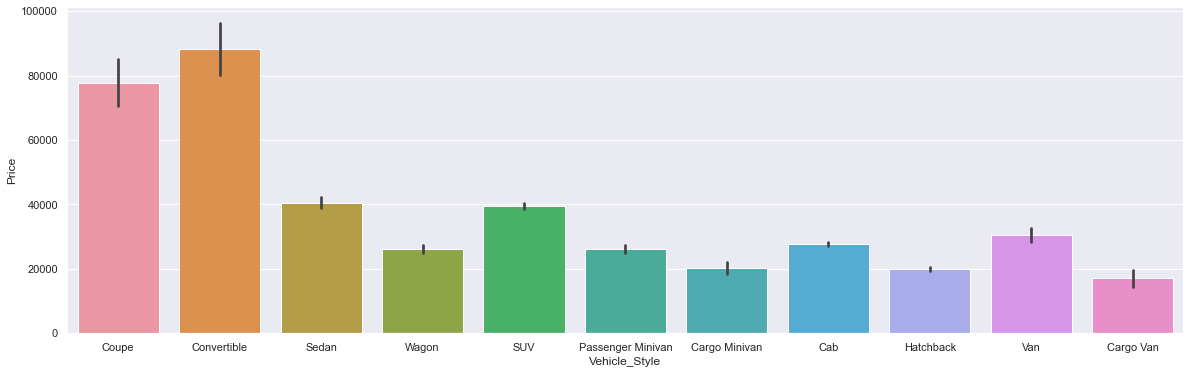

In [188]:
## Bar chart of Vehicle Style Type Vs Price
plt.figure(figsize = (20,6))
sns.barplot(x='Vehicle_Style', y = 'Price', data = df5)

<AxesSubplot:xlabel='Engine_Fuel_Type', ylabel='Price'>

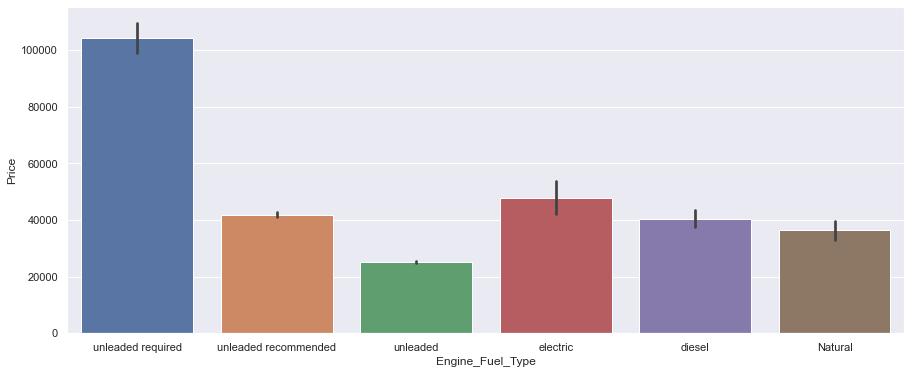

In [189]:
## Bar chart of Engine Fuel Type Type Vs Price
plt.figure(figsize = (15,6))
sns.barplot(x='Engine_Fuel_Type', y = 'Price', data = df5)

<AxesSubplot:xlabel='Year_bin', ylabel='Price'>

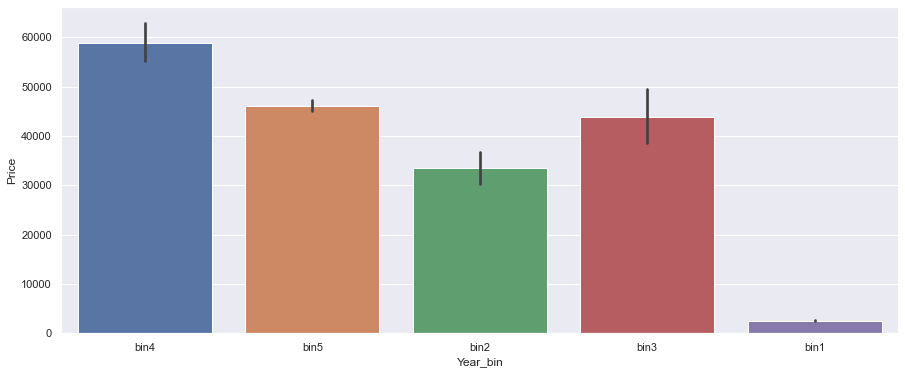

In [190]:
## Bar chart of Year_bin Type Type Vs Price
plt.figure(figsize = (15,6))
sns.barplot(x='Year_bin', y = 'Price', data = df5)

<AxesSubplot:xlabel='Price_range', ylabel='Price'>

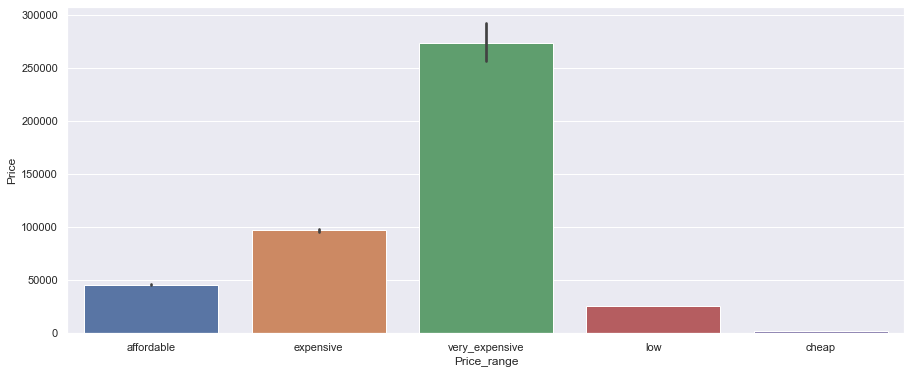

In [191]:
## Bar chart of Price_range Type Type Vs Price
plt.figure(figsize = (15,6))
sns.barplot(x='Price_range', y = 'Price', data = df5)

<AxesSubplot:xlabel='year_old', ylabel='Density'>

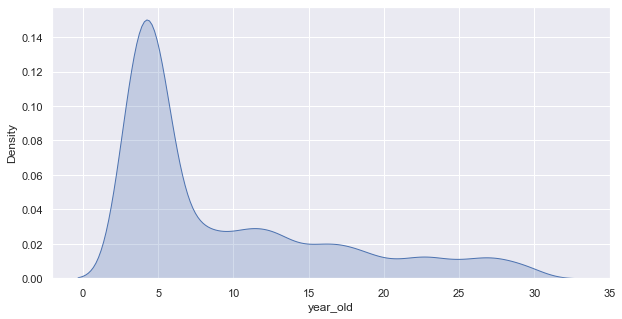

In [192]:
#age of car
sns.set(rc={'figure.figsize':(10,5)})
sns.kdeplot(df5['year_old'],shade=True)

<AxesSubplot:xlabel='sales_demand_range', ylabel='Price'>

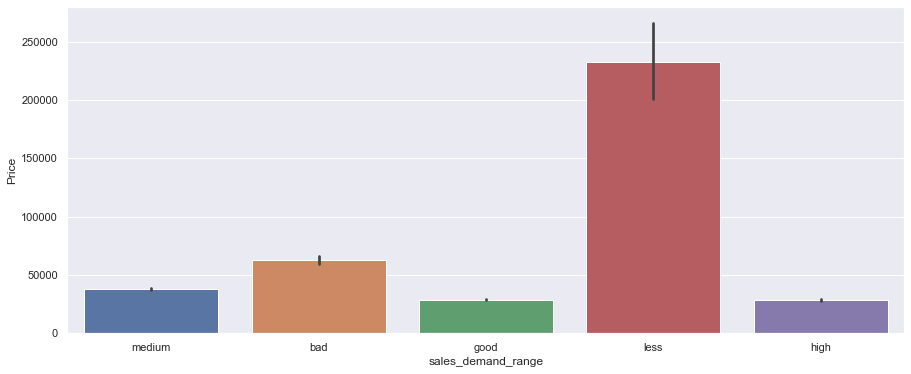

In [193]:
## Bar chart of sales demand Type Type Vs Price
plt.figure(figsize = (15,6))
sns.barplot(x='sales_demand_range', y = 'Price', data = df5)

### OLS Model

In [194]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
col_to_scale = ['Engine_HP','Popularity','avg_eco_mpg', 'Engine_Cylinders',#'highway_MPG', 'city_mpg',
                'popularity_ratio','num_of_feature','hp_per_cyl','year_old']
df5[col_to_scale] = min_max.fit_transform(df5[col_to_scale])
df5.head()

,Make,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,Popularity,...,avg_eco_mpg,popularity_ratio,sales_demand_range,popularity_range,num_of_feature,hp_per_cyl,year_old,condition,Year_bin,Price_range
0,BMW,unleaded required,0.295983,0.375,MANUAL,rear wheel drive,2,Compact,Coupe,0.692131,...,0.079020,0.692131,medium,high,0.5,0.431145,0.222222,old,bin4,affordable
1,BMW,unleaded required,0.280127,0.375,AUTOMATIC,rear wheel drive,2,Compact,Convertible,0.692131,...,0.096172,0.692131,medium,high,0.5,0.411840,0.037037,new,bin5,affordable
2,BMW,unleaded required,0.280127,0.375,AUTOMATIC,rear wheel drive,2,Compact,Coupe,0.692131,...,0.096172,0.692131,medium,high,0.5,0.411840,0.037037,new,bin5,affordable
3,BMW,unleaded required,0.280127,0.375,AUTOMATIC,all wheel drive,2,Compact,Coupe,0.692131,...,0.093415,0.692131,medium,high,0.5,0.411840,0.037037,new,bin5,affordable
4,BMW,unleaded required,0.280127,0.375,AUTOMATIC,rear wheel drive,2,Compact,Convertible,0.692131,...,0.093415,0.692131,medium,high,0.5,0.411840,0.037037,new,bin5,affordable


In [195]:
df6= df3['Market_Category'].str.join(sep='').str.get_dummies(sep=',')

In [196]:
df5 = pd.merge(df5, df6, left_index = True, right_index = True)

In [197]:
df6

,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,0,0,0,1,0,0,1,0,1,0
1,0,0,0,1,0,0,1,0,1,0
2,0,0,0,1,0,0,1,0,1,0
3,0,0,0,1,0,0,1,0,1,0
4,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
11194,0,0,1,0,0,0,0,0,0,1
11195,0,0,1,0,0,0,0,0,0,1
11196,0,0,1,0,0,0,0,0,0,1
11197,0,0,1,0,0,0,0,0,0,1


In [198]:
df5.columns.tolist()

['Make',
 'Engine_Fuel_Type',
 'Engine_HP',
 'Engine_Cylinders',
 'Transmission_Type',
 'Driven_Wheels',
 'Number_of_Doors',
 'Vehicle_Size',
 'Vehicle_Style',
 'Popularity',
 'Price',
 'avg_eco_mpg',
 'popularity_ratio',
 'sales_demand_range',
 'popularity_range',
 'num_of_feature',
 'hp_per_cyl',
 'year_old',
 'condition',
 'Year_bin',
 'Price_range',
 'Crossover',
 'Diesel',
 'Exotic',
 'Factory Tuner',
 'Flex Fuel',
 'Hatchback',
 'High-Performance',
 'Hybrid',
 'Luxury',
 'Performance']

In [199]:
#df5['Price']=np.log1p(df5['Price'])
#df5['Price']=np.sqrt(np.log1p(df5['Price']))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

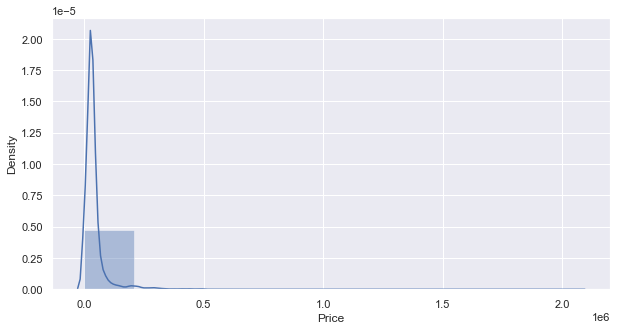

In [200]:
sns.distplot(df5['Price'], bins=10)
plt.plot()

In [201]:
## Convert categorical variables to dummies
df5= pd.get_dummies(data=df5, columns = ['Make','Engine_Fuel_Type', 'Transmission_Type', 'Driven_Wheels', 'Vehicle_Size','Price_range',
                                         'Vehicle_Style','sales_demand_range','popularity_range','Year_bin','Number_of_Doors','condition'], \
                                   prefix = ['Make','Engine_Fuel_Type', 'Transmission_Type', 'Driven_Wheels', 'Vehicle_Size','Price_range',
                                             'Vehicle_Style','sales_demand_range','popularity_range','Year_bin','Number_of_Doors','condition'], 
                                   drop_first=True)
df5.head()

,Engine_HP,Engine_Cylinders,Popularity,Price,avg_eco_mpg,popularity_ratio,num_of_feature,hp_per_cyl,year_old,Crossover,...,popularity_range_medium,Year_bin_bin2,Year_bin_bin3,Year_bin_bin4,Year_bin_bin5,Number_of_Doors_3,Number_of_Doors_4,condition_notfit,condition_old,condition_vintage
0,0.295983,0.375,0.692131,46135,0.079020,0.692131,0.5,0.431145,0.222222,0,...,0,0,0,1,0,0,0,0,1,0
1,0.280127,0.375,0.692131,48750,0.096172,0.692131,0.5,0.411840,0.037037,0,...,0,0,0,0,1,0,0,0,0,0
2,0.280127,0.375,0.692131,44150,0.096172,0.692131,0.5,0.411840,0.037037,0,...,0,0,0,0,1,0,0,0,0,0
3,0.280127,0.375,0.692131,46150,0.093415,0.692131,0.5,0.411840,0.037037,0,...,0,0,0,0,1,0,0,0,0,0
4,0.280127,0.375,0.692131,50750,0.093415,0.692131,0.5,0.411840,0.037037,0,...,0,0,0,0,1,0,0,0,0,0


In [202]:
df5.columns.tolist()

['Engine_HP',
 'Engine_Cylinders',
 'Popularity',
 'Price',
 'avg_eco_mpg',
 'popularity_ratio',
 'num_of_feature',
 'hp_per_cyl',
 'year_old',
 'Crossover',
 'Diesel',
 'Exotic',
 'Factory Tuner',
 'Flex Fuel',
 'Hatchback',
 'High-Performance',
 'Hybrid',
 'Luxury',
 'Performance',
 'Make_Alfa Romeo',
 'Make_Aston Martin',
 'Make_Audi',
 'Make_BMW',
 'Make_Bentley',
 'Make_Bugatti',
 'Make_Buick',
 'Make_Cadillac',
 'Make_Chevrolet',
 'Make_Chrysler',
 'Make_Dodge',
 'Make_FIAT',
 'Make_Ferrari',
 'Make_Ford',
 'Make_GMC',
 'Make_Genesis',
 'Make_HUMMER',
 'Make_Honda',
 'Make_Hyundai',
 'Make_Infiniti',
 'Make_Kia',
 'Make_Lamborghini',
 'Make_Land Rover',
 'Make_Lexus',
 'Make_Lincoln',
 'Make_Lotus',
 'Make_Maserati',
 'Make_Maybach',
 'Make_Mazda',
 'Make_McLaren',
 'Make_Mercedes-Benz',
 'Make_Mitsubishi',
 'Make_Nissan',
 'Make_Oldsmobile',
 'Make_Plymouth',
 'Make_Pontiac',
 'Make_Porsche',
 'Make_Rolls-Royce',
 'Make_Saab',
 'Make_Scion',
 'Make_Spyker',
 'Make_Subaru',
 'Mak

In [203]:
len(df5.columns)

109

In [204]:
df5.isnull().sum().sort_values()

Engine_HP                          0
Vehicle_Size_Large                 0
Driven_Wheels_rear wheel drive     0
Driven_Wheels_front wheel drive    0
Driven_Wheels_four wheel drive     0
                                  ..
Make_FIAT                          0
Make_Dodge                         0
Make_Chrysler                      0
Make_Kia                           0
condition_vintage                  0
Length: 109, dtype: int64

In [205]:
df5['num_of_feature'].fillna(df5['num_of_feature'].mode()[0], inplace=True)

In [206]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine_HP,11199.0,0.209261,0.116358,0.0,0.122622,0.192389,0.262156,1.0
Engine_Cylinders,11199.0,0.354323,0.112351,0.0,0.250000,0.375000,0.375000,1.0
Popularity,11199.0,0.275240,0.255644,0.0,0.096729,0.244562,0.354907,1.0
Price,11199.0,41925.927136,61535.047817,2000.0,21599.500000,30675.000000,43032.500000,2065902.0
avg_eco_mpg,11199.0,0.083169,0.054081,0.0,0.055743,0.075038,0.100153,1.0
...,...,...,...,...,...,...,...,...
Number_of_Doors_3,11199.0,0.031789,0.175445,0.0,0.000000,0.000000,0.000000,1.0
Number_of_Doors_4,11199.0,0.711314,0.453172,0.0,0.000000,1.000000,1.000000,1.0
condition_notfit,11199.0,0.153049,0.360051,0.0,0.000000,0.000000,0.000000,1.0
condition_old,11199.0,0.453076,0.497816,0.0,0.000000,0.000000,1.000000,1.0


In [207]:
corr_data_2 = df5.corr()

In [208]:
corr_data_2

,Engine_HP,Engine_Cylinders,Popularity,Price,avg_eco_mpg,popularity_ratio,num_of_feature,hp_per_cyl,year_old,Crossover,...,popularity_range_medium,Year_bin_bin2,Year_bin_bin3,Year_bin_bin4,Year_bin_bin5,Number_of_Doors_3,Number_of_Doors_4,condition_notfit,condition_old,condition_vintage
Engine_HP,1.000000,0.778035,0.039312,0.656712,-0.396203,0.039312,0.536794,0.661690,-0.332808,-0.151673,...,0.016043,-0.143296,-0.021794,0.089509,0.199743,-0.066616,-0.112680,-0.209419,0.131846,-0.229684
Engine_Cylinders,0.778035,1.000000,0.037709,0.537458,-0.581389,0.037709,0.299832,0.156338,0.033372,-0.164729,...,0.020862,0.031912,0.088209,0.067546,-0.109771,0.070159,-0.156825,0.042641,0.074210,-0.049464
Popularity,0.039312,0.037709,1.000000,-0.048371,-0.008166,1.000000,-0.062104,0.021274,-0.085874,-0.022812,...,0.105859,-0.050812,-0.059728,-0.101539,0.145534,0.163677,-0.086779,-0.025940,-0.071309,-0.039577
Price,0.656712,0.537458,-0.048371,1.000000,-0.169065,-0.048371,0.425221,0.336657,-0.209635,-0.103021,...,-0.040951,-0.041874,0.011430,0.120597,0.070424,-0.065096,-0.126410,-0.121745,0.133344,-0.168005
avg_eco_mpg,-0.396203,-0.581389,-0.008166,-0.169065,1.000000,-0.008166,-0.085499,-0.245019,-0.219820,-0.002567,...,0.045927,-0.106372,-0.142004,-0.007808,0.231895,-0.135727,0.143610,-0.154424,-0.007056,-0.066068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Number_of_Doors_3,-0.066616,0.070159,0.163677,-0.065096,-0.135727,0.163677,-0.090908,-0.152768,0.127907,-0.050692,...,-0.011530,0.084413,-0.057031,0.004078,-0.091856,1.000000,-0.284425,0.151993,-0.064717,0.038221
Number_of_Doors_4,-0.112680,-0.156825,-0.086779,-0.126410,0.143610,-0.086779,-0.080124,0.016616,-0.263330,0.298594,...,-0.013365,-0.086234,0.010611,0.010846,0.190708,-0.284425,1.000000,-0.174696,0.062859,-0.159125
condition_notfit,-0.209419,0.042641,-0.025940,-0.121745,-0.154424,-0.025940,-0.110868,-0.355872,0.563760,-0.016658,...,-0.078170,0.720721,-0.004018,-0.185722,-0.437695,0.151993,-0.174696,1.000000,-0.386909,-0.110848
condition_old,0.131846,0.074210,-0.071309,0.133344,-0.007056,-0.071309,0.093349,0.111357,-0.200787,-0.003310,...,-0.007201,-0.278854,0.305269,0.480014,-0.195993,-0.064717,0.062859,-0.386909,1.000000,-0.237335


In [209]:
df5.columns.tolist()

['Engine_HP',
 'Engine_Cylinders',
 'Popularity',
 'Price',
 'avg_eco_mpg',
 'popularity_ratio',
 'num_of_feature',
 'hp_per_cyl',
 'year_old',
 'Crossover',
 'Diesel',
 'Exotic',
 'Factory Tuner',
 'Flex Fuel',
 'Hatchback',
 'High-Performance',
 'Hybrid',
 'Luxury',
 'Performance',
 'Make_Alfa Romeo',
 'Make_Aston Martin',
 'Make_Audi',
 'Make_BMW',
 'Make_Bentley',
 'Make_Bugatti',
 'Make_Buick',
 'Make_Cadillac',
 'Make_Chevrolet',
 'Make_Chrysler',
 'Make_Dodge',
 'Make_FIAT',
 'Make_Ferrari',
 'Make_Ford',
 'Make_GMC',
 'Make_Genesis',
 'Make_HUMMER',
 'Make_Honda',
 'Make_Hyundai',
 'Make_Infiniti',
 'Make_Kia',
 'Make_Lamborghini',
 'Make_Land Rover',
 'Make_Lexus',
 'Make_Lincoln',
 'Make_Lotus',
 'Make_Maserati',
 'Make_Maybach',
 'Make_Mazda',
 'Make_McLaren',
 'Make_Mercedes-Benz',
 'Make_Mitsubishi',
 'Make_Nissan',
 'Make_Oldsmobile',
 'Make_Plymouth',
 'Make_Pontiac',
 'Make_Porsche',
 'Make_Rolls-Royce',
 'Make_Saab',
 'Make_Scion',
 'Make_Spyker',
 'Make_Subaru',
 'Mak

In [210]:
len(df5.columns.tolist())

109

In [211]:
#import seaborn as sns
#f,ax=plt.subplots(figsize=(30,30))
#sns.heatmap(corr_data_2, ax=ax,cmap="gist_rainbow", linewidths=0.1, annot = True)
#plt.show()

In [212]:
high_corr=df5.corr()
high_corr_features=high_corr.index[abs(high_corr['Price'])>=0.15]

In [213]:
high_corr_features

Index(['Engine_HP', 'Engine_Cylinders', 'Price', 'avg_eco_mpg',
       'num_of_feature', 'hp_per_cyl', 'year_old', 'Exotic', 'Factory Tuner',
       'Hatchback', 'High-Performance', 'Luxury', 'Make_Aston Martin',
       'Make_Bentley', 'Make_Bugatti', 'Make_Ferrari', 'Make_Lamborghini',
       'Make_Maybach', 'Make_Rolls-Royce', 'Engine_Fuel_Type_unleaded',
       'Engine_Fuel_Type_unleaded required', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', 'Price_range_cheap',
       'Price_range_expensive', 'Price_range_low',
       'Price_range_very_expensive', 'Vehicle_Style_Convertible',
       'Vehicle_Style_Coupe', 'sales_demand_range_less', 'condition_vintage'],
      dtype='object')

In [214]:
len(high_corr_features)

31

In [215]:
import statsmodels.api as sm 
X = df5[[#'Engine_HP', 
    'Engine_Cylinders', #'avg_eco_mpg',
       'num_of_feature', 'hp_per_cyl', #'year_old', 
         #'Exotic', 
    'Factory Tuner',
       #'Hatchback', 
         #'High-Performance', 
         #'Luxury', 
    'Make_Aston Martin',
       'Make_Bentley', 'Make_Bugatti', 'Make_Ferrari', 'Make_Lamborghini',
       'Make_Maybach', 'Make_Rolls-Royce', 'Engine_Fuel_Type_unleaded',
       #'Engine_Fuel_Type_unleaded required', 
         'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', 'Price_range_cheap',
       'Price_range_expensive', 'Price_range_low',
       'Price_range_very_expensive', 'Vehicle_Style_Convertible',
       #'Vehicle_Style_Coupe', 
         'sales_demand_range_less', #'condition_vintage'
]]
Y = df5['Price']


X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     3647.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:10:53   Log-Likelihood:            -1.2808e+05
No. Observations:               11199   AIC:                         2.562e+05
Df Residuals:                   11178   BIC:                         2.564e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [216]:
Pred_sale=model.predict(X)

In [217]:
from sklearn import metrics # use to evaluate the model 

In [218]:
print('Mean Absolute Error :', metrics.mean_absolute_error(Y, Pred_sale))  
print('Mean Squared Error :', metrics.mean_squared_error(Y, Pred_sale))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(Y, Pred_sale)))

Mean Absolute Error : 6817.705010218787
Mean Squared Error : 503154168.1386668
Root Mean Squared Error : 22431.09823746191


In [219]:
X_copy=X.copy()

In [220]:
X_copy["Pred_sale"]=Pred_sale
X_copy["Actual_Sale"]=Y
#X_copy.to_excel("X_Pred1.xlsx")

In [221]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['vif_value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values('vif_value', ascending=False)
vif

,vif_value,features
0,78.214393,const
18,3.787954,Price_range_very_expensive
2,2.326932,num_of_feature
17,2.225384,Price_range_low
1,2.160378,Engine_Cylinders
20,2.014082,sales_demand_range_less
3,2.012140,hp_per_cyl
15,1.951085,Price_range_cheap
12,1.785511,Engine_Fuel_Type_unleaded
9,1.767358,Make_Lamborghini


In [222]:
X_copy

,const,Engine_Cylinders,num_of_feature,hp_per_cyl,Factory Tuner,Make_Aston Martin,Make_Bentley,Make_Bugatti,Make_Ferrari,Make_Lamborghini,...,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Price_range_cheap,Price_range_expensive,Price_range_low,Price_range_very_expensive,Vehicle_Style_Convertible,sales_demand_range_less,Pred_sale,Actual_Sale
0,1.0,0.375,0.50,0.431145,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,48346.705599,46135
1,1.0,0.375,0.50,0.411840,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,54584.509378,48750
2,1.0,0.375,0.50,0.411840,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,47699.050934,44150
3,1.0,0.375,0.50,0.411840,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49666.857247,46150
4,1.0,0.375,0.50,0.411840,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,54584.509378,50750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,1.0,0.000,0.25,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,26395.681328,66000
11195,1.0,0.000,0.25,0.000000,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,64365.935623,74500
11196,1.0,0.000,0.25,0.000000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,66333.741936,71000
11197,1.0,0.000,0.25,0.000000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,66333.741936,75000


In [223]:
X_copy.isnull().sum()

const                              0
Engine_Cylinders                   0
num_of_feature                     0
hp_per_cyl                         0
Factory Tuner                      0
Make_Aston Martin                  0
Make_Bentley                       0
Make_Bugatti                       0
Make_Ferrari                       0
Make_Lamborghini                   0
Make_Maybach                       0
Make_Rolls-Royce                   0
Engine_Fuel_Type_unleaded          0
Driven_Wheels_front wheel drive    0
Driven_Wheels_rear wheel drive     0
Price_range_cheap                  0
Price_range_expensive              0
Price_range_low                    0
Price_range_very_expensive         0
Vehicle_Style_Convertible          0
sales_demand_range_less            0
Pred_sale                          0
Actual_Sale                        0
dtype: int64

### Linear Regression

In [224]:
X = df5[[#'Engine_HP', 
    #'Engine_Cylinders', 
    #'avg_eco_mpg',
       'num_of_feature', #'hp_per_cyl',
    #'year_old', 
         #'Exotic', 
    'Factory Tuner',
       #'Hatchback', 
         #'High-Performance', 
         #'Luxury', 
    'Make_Aston Martin',
       'Make_Bentley', 'Make_Bugatti', 'Make_Ferrari', 'Make_Lamborghini',
       'Make_Maybach', 'Make_Rolls-Royce', 'Engine_Fuel_Type_unleaded',
       #'Engine_Fuel_Type_unleaded required', 
         'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', 'Price_range_cheap',
       'Price_range_expensive', 'Price_range_low',
       'Price_range_very_expensive', 'Vehicle_Style_Convertible',
       #'Vehicle_Style_Coupe', 
         'sales_demand_range_less', #'condition_vintage'
        ]]
Y = df5['Price']


In [225]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [226]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .3, random_state = 88)

In [227]:
linearRegressor = LinearRegression() 

In [228]:
linearRegressor.fit(xTrain, yTrain)  # We are training our model

LinearRegression()

In [229]:
linearRegressor.intercept_

45552.382918331874

In [230]:
linearRegressor.coef_

array([ 1.49952491e+04, -2.28513095e+03,  2.98051662e+04,  4.26948312e+04,
        1.58379207e+06,  3.45760696e+04,  1.23967806e+05,  4.00762375e+05,
        1.38614510e+05, -2.79799594e+03, -4.27833002e+03, -5.70365527e+02,
       -3.91865412e+04,  4.38439416e+04, -1.59136164e+04,  1.49922771e+05,
        8.09961261e+03, -6.50413738e+01])

In [231]:
coeff_df = pd.DataFrame(linearRegressor.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by = 'Coefficient', ascending = False)

,Coefficient
Make_Bugatti,1.583792e+06
Make_Maybach,4.007624e+05
Price_range_very_expensive,1.499228e+05
Make_Rolls-Royce,1.386145e+05
Make_Lamborghini,1.239678e+05
Price_range_expensive,4.384394e+04
Make_Bentley,4.269483e+04
Make_Ferrari,3.457607e+04
Make_Aston Martin,2.980517e+04
num_of_feature,1.499525e+04


In [232]:
X.columns

Index(['num_of_feature', 'Factory Tuner', 'Make_Aston Martin', 'Make_Bentley',
       'Make_Bugatti', 'Make_Ferrari', 'Make_Lamborghini', 'Make_Maybach',
       'Make_Rolls-Royce', 'Engine_Fuel_Type_unleaded',
       'Driven_Wheels_front wheel drive', 'Driven_Wheels_rear wheel drive',
       'Price_range_cheap', 'Price_range_expensive', 'Price_range_low',
       'Price_range_very_expensive', 'Vehicle_Style_Convertible',
       'sales_demand_range_less'],
      dtype='object')

In [233]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['vif_value'] = [variance_inflation_factor(xTrain.values, i) for i in range(xTrain.shape[1])]
vif["features"] = xTrain.columns
vif.sort_values('vif_value', ascending=False)

,vif_value,features
15,3.787628,Price_range_very_expensive
9,3.420857,Engine_Fuel_Type_unleaded
14,3.243729,Price_range_low
10,2.407208,Driven_Wheels_front wheel drive
0,2.285057,num_of_feature
17,2.011560,sales_demand_range_less
6,1.850031,Make_Lamborghini
11,1.776263,Driven_Wheels_rear wheel drive
3,1.692558,Make_Bentley
12,1.672964,Price_range_cheap


In [234]:
yPrediction = linearRegressor.predict(xTrain)

In [235]:
yPrediction

array([22562.44054237, 26270.40503979, 22562.44054237, ...,
       22562.44054237, 22562.44054237, 26270.40503979])

In [236]:
y_pred_anti = yPrediction
y_act_anti = yTrain

In [237]:
pred = pd.DataFrame({'Actual Sale': y_act_anti, 'Predicted sales': y_pred_anti})
df_pred=pred.head(25)
df_pred

,Actual Sale,Predicted sales
6943,25099,22562.440542
8569,30560,26270.405040
4019,17340,22562.440542
5968,31840,25360.436478
2193,30550,30572.930087
5162,19945,22562.440542
10874,58400,53050.007479
2406,35800,49301.195199
5192,25560,25360.436478
2375,34800,33387.578782


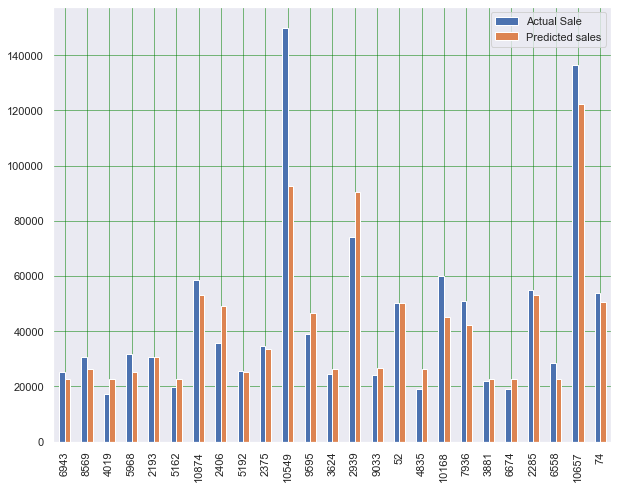

In [238]:
df_pred.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [239]:
from sklearn import metrics
print('Mean Absolute Error :', metrics.mean_absolute_error(y_act_anti, y_pred_anti))  
print('Mean Squared Error :', metrics.mean_squared_error(y_act_anti, y_pred_anti))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_act_anti, y_pred_anti)))

Mean Absolute Error : 7614.980514252214
Mean Squared Error : 613131763.923892
Root Mean Squared Error : 24761.497610683648


In [240]:
SS_Residual = sum((yTrain-yPrediction)**2)
SS_Total = sum((yTrain-np.mean(yTrain))**2)
#r_squared = 1 - (float(SS_Residual))/SS_Total
r_squared=(SS_Total-SS_Residual)/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(yTrain)-1)/(len(yTrain)-xTrain.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.844148307545652 0.8437895696346317


# Question 1: Find the factors which are responsible for Price of the car

Below are the factors affecting the price of car.

In [241]:
coeff_df = pd.DataFrame(linearRegressor.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by = 'Coefficient', ascending = False)

,Coefficient
Make_Bugatti,1.583792e+06
Make_Maybach,4.007624e+05
Price_range_very_expensive,1.499228e+05
Make_Rolls-Royce,1.386145e+05
Make_Lamborghini,1.239678e+05
Price_range_expensive,4.384394e+04
Make_Bentley,4.269483e+04
Make_Ferrari,3.457607e+04
Make_Aston Martin,2.980517e+04
num_of_feature,1.499525e+04


# Question 2: Write the equation to find price of a car

In [242]:
inter = linearRegressor.intercept_

In [243]:
inter

45552.382918331874

In [244]:
coeff = linearRegressor.coef_

In [245]:
coeff.sort()

In [246]:
coeff

array([-3.91865412e+04, -1.59136164e+04, -4.27833002e+03, -2.79799594e+03,
       -2.28513095e+03, -5.70365527e+02, -6.50413738e+01,  8.09961261e+03,
        1.49952491e+04,  2.98051662e+04,  3.45760696e+04,  4.26948312e+04,
        4.38439416e+04,  1.23967806e+05,  1.38614510e+05,  1.49922771e+05,
        4.00762375e+05,  1.58379207e+06])

# Question 3: How the factors are affecting the price

In [247]:
corr_data_2

,Engine_HP,Engine_Cylinders,Popularity,Price,avg_eco_mpg,popularity_ratio,num_of_feature,hp_per_cyl,year_old,Crossover,...,popularity_range_medium,Year_bin_bin2,Year_bin_bin3,Year_bin_bin4,Year_bin_bin5,Number_of_Doors_3,Number_of_Doors_4,condition_notfit,condition_old,condition_vintage
Engine_HP,1.000000,0.778035,0.039312,0.656712,-0.396203,0.039312,0.536794,0.661690,-0.332808,-0.151673,...,0.016043,-0.143296,-0.021794,0.089509,0.199743,-0.066616,-0.112680,-0.209419,0.131846,-0.229684
Engine_Cylinders,0.778035,1.000000,0.037709,0.537458,-0.581389,0.037709,0.299832,0.156338,0.033372,-0.164729,...,0.020862,0.031912,0.088209,0.067546,-0.109771,0.070159,-0.156825,0.042641,0.074210,-0.049464
Popularity,0.039312,0.037709,1.000000,-0.048371,-0.008166,1.000000,-0.062104,0.021274,-0.085874,-0.022812,...,0.105859,-0.050812,-0.059728,-0.101539,0.145534,0.163677,-0.086779,-0.025940,-0.071309,-0.039577
Price,0.656712,0.537458,-0.048371,1.000000,-0.169065,-0.048371,0.425221,0.336657,-0.209635,-0.103021,...,-0.040951,-0.041874,0.011430,0.120597,0.070424,-0.065096,-0.126410,-0.121745,0.133344,-0.168005
avg_eco_mpg,-0.396203,-0.581389,-0.008166,-0.169065,1.000000,-0.008166,-0.085499,-0.245019,-0.219820,-0.002567,...,0.045927,-0.106372,-0.142004,-0.007808,0.231895,-0.135727,0.143610,-0.154424,-0.007056,-0.066068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Number_of_Doors_3,-0.066616,0.070159,0.163677,-0.065096,-0.135727,0.163677,-0.090908,-0.152768,0.127907,-0.050692,...,-0.011530,0.084413,-0.057031,0.004078,-0.091856,1.000000,-0.284425,0.151993,-0.064717,0.038221
Number_of_Doors_4,-0.112680,-0.156825,-0.086779,-0.126410,0.143610,-0.086779,-0.080124,0.016616,-0.263330,0.298594,...,-0.013365,-0.086234,0.010611,0.010846,0.190708,-0.284425,1.000000,-0.174696,0.062859,-0.159125
condition_notfit,-0.209419,0.042641,-0.025940,-0.121745,-0.154424,-0.025940,-0.110868,-0.355872,0.563760,-0.016658,...,-0.078170,0.720721,-0.004018,-0.185722,-0.437695,0.151993,-0.174696,1.000000,-0.386909,-0.110848
condition_old,0.131846,0.074210,-0.071309,0.133344,-0.007056,-0.071309,0.093349,0.111357,-0.200787,-0.003310,...,-0.007201,-0.278854,0.305269,0.480014,-0.195993,-0.064717,0.062859,-0.386909,1.000000,-0.237335


# Question 4: What is the R^2 and adj. R^2 ? 

#Model:                            OLS

R-squared:                       0.818

Adj. R-squared:                  0.818



#Model:                            Linear

R-squared:                       0.7983339019117471

Adj. R-squared:                  0.7978438576779989

# Question 5: What is RMSE. How to reduce it ?

The root-mean-square error (RMSE) is the differences between values predicted by a model and the values observed.
RMSE tends to be sensitive to outliers, so keeping the dataset clean from outliers will minimise the RMSE.

#Model: OLS

Root Mean Squared Error : 26256.656360181176

#Model: Linear

Root Mean Squared Error : 28166.805458989373